## ProbSpace YouTube View's Prediction

In [118]:
import numpy as np
import pandas as pd
import japanize_matplotlib

In [119]:
import MeCab
from tqdm import tqdm

In [120]:
train_path = "../input/train_data.csv"
test_path = "../input/test_data.csv"

In [121]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

## data size

In [122]:
train.shape, test.shape

((19720, 17), (29582, 16))

In [123]:
train.head()

id     video_id                                       title  \
0   1  GDtyztIThRQ  [12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~   
1   2  m4H9s3GtTlQ         ねごと - メルシールー [Official Music Video]   
2   3  z19zYZuLuEU                      VF3tb 闇よだれvsちび太 (SEGA)   
3   4  pmcIOsL7s98                        free frosty weekend!   
4   5  ZuQgsTcuM-4                               トップ・オブ・ザ・ワールド   

                publishedAt                 channelId          channelTitle  \
0  2011-01-09T05:50:33.000Z  UCQaNYC3dNvH8FqrEyK7hTJw           DjangoShiny   
1  2012-07-23T03:00:09.000Z  UChMWDi-HBm5aS3jyRSaAWUA  ねごと Official Channel   
2  2007-07-26T13:54:09.000Z  UCBdcyoZSt5HBLd_n6we-xIg               siropai   
3  2005-05-15T02:38:43.000Z  UC7K5am1UAQEsCRhzXpi9i1g          Jones4Carrie   
4  2007-09-09T09:52:47.000Z  UCTW1um4R-QWa8iIfITGvlZQ      Tatsuya Maruyama   

   categoryId collection_date  \
0          20        20.01.02   
1          10        20.08.02   
2          24        20.14.01   
3          22        19.22.12   
4          10        20.08.01   

                                                tags  likes  dislikes  \
0  Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...    114         0   
1  ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...   2885        50   
2  VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...    133        17   
3                                             frosty    287        51   
4  ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...    178         6   

   comment_count                                  thumbnail_link  \
0              7  https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg   
1            111  https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg   
2             14  https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg   
3            173  https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg   
4             17  https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description       y  
0  ~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...   29229  
1  http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...  730280  
2      Beat-tribe cup finalhttp://ameblo.jp/siropai/   80667  
3                     I look so bad  but look at me!   34826  
4  ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...  172727

In [124]:
train.columns

Index(['id', 'video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'collection_date', 'tags', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'y'],
      dtype='object')

## Check column types 

In [125]:
train.dtypes

id                    int64
video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
collection_date      object
tags                 object
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
y                     int64
dtype: object

## Check null

In [126]:
display(train.isnull().sum())
test.isnull().sum()
# trainには"tags"と"description"、testには"description"に欠損値

id                     0
video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
collection_date        0
tags                   1
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          312
y                      0
dtype: int64

id                     0
video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
collection_date        0
tags                   0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          478
dtype: int64

## video_id

In [127]:
train["video_id"].value_counts() 
# 全てユニークな値

zf2aIVKp1OY    1
1ysqYULKFsw    1
izWmvUWWWIY    1
V16-W7ARMLw    1
QkNwKtVKio8    1
              ..
HmyfdGl7toE    1
Kncxufz05Nk    1
0matI8mBLG0    1
TIQdnssKF44    1
GvxQoIsuquk    1
Name: video_id, Length: 19720, dtype: int64

In [128]:
test["video_id"].value_counts() 
# 全てユニークな値、トピックよりtrainとは全て異なる値

EiTYpPANGFQ    1
tae6d5XxNN8    1
JhjZAOhnpvU    1
zc9KcRSxVqY    1
tGqnDo1IpuM    1
              ..
O1WdLALG1jI    1
3UYJ0MY1l1o    1
YyjtDZMXxHM    1
1OPm9AhDjJk    1
ajC92cStzzc    1
Name: video_id, Length: 29582, dtype: int64

## title

In [129]:
train["title"].value_counts() 

Pull Scrapers - Bell 4206D & STX 325 single pull scrapers    4
女王蜂 『デスコ』                                                    2
自然の音とともに音楽をリラックス バンブーウォーターファウンテン 【癒し音楽BGM】                   2
新幹線500系のぞみ shinkansen 500 series                             2
産室ですごす母親シンシンと子ども                                             2
                                                            ..
土の音がこだまする町 A Town of Earthy Echo                             1
米津玄師 MV「Flamingo」                                            1
ALEXISONFIRE No Transitory (Official Music Video)            1
奥様はブラジル人(Esposa é brasileira)02                              1
Smartest Living People in the World                          1
Name: title, Length: 19699, dtype: int64

In [130]:
test["title"].value_counts() 
# トピックよりtrainと56種類の値が共通している

niagra                                                                                    4
懐かしの素人ものまね                                                                                3
日産デュアリス                                                                                   2
It's for you                                                                              2
Shaolin Deadly Kicks                                                                      2
                                                                                         ..
桑田佳祐 - 100万年の幸せ!!                                                                         1
Do Sher (1994) दो शेर │Full Movie Dubbed In Punjabi│Akshay Kumar, Sunil Shetty            1
Merle Haggard's Workin Man Blues LIVE!                                                    1
鈴木絢音のモノマネをする北野日奈子と渡辺みり愛【乃木坂46】                                                            1
KopBuster Barry Cooper Reacts to Yolanda Madden Guilty Plea - Odessa Police Depa

In [132]:
def preNLP(data,c):
    data[c] = data[c].str.replace(' ','')
    data[c] = data[c].str.replace('　','')
    data[c] = data[c].str.replace('\(.+?\)','',regex=True)
    data[c] = data[c].str.replace('\（.+?\）','',regex=True)
    data[c] = data[c].str.replace('\n','')
    data[c] = data[c].str.replace('\n','',regex=True)
    return data

In [134]:
train = preNLP(train, "title")

In [135]:
tagger = MeCab.Tagger("/usr/local/lib/mecab/dic/mecab-ipadic-neologd")
join=train
stop_words=['の','し','いき','こと','さん']
parts = ["名詞"]
all_words_df = pd.DataFrame()
result = []

for n in tqdm(range(len(join))):
    text = join["title"].iloc[n]
    words = tagger.parse(text).splitlines()
    print(words)
    words_df = pd.DataFrame()
    """for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split("|")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_df[word_tmp] = [1]#単語を列として定義して、数値の１を代入。それを１つの項目ごとに行う
    all_words_df = pd.concat([all_words_df, words_df] ,ignore_index=True)"""
all_words_df.head()


  0%|          | 37/19720 [00:00<03:57, 83.04it/s]

['[\t名詞,サ変接続,*,*,*,*,*', '12\t名詞,数,*,*,*,*,*', ']\t名詞,サ変接続,*,*,*,*,*', 'BGMInazumaEleven\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', '-~\t名詞,サ変接続,*,*,*,*,*', 'ライオコツトダンジョン\t名詞,一般,*,*,*,*,*', '~\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['ねご\t動詞,自立,*,*,五段・ガ行,未然ウ接続,ねぐ,ネゴ,ネゴ', 'と\t助詞,格助詞,引用,*,*,*,と,ト,ト', '-\t名詞,サ変接続,*,*,*,*,*', 'メルシールー\t名詞,一般,*,*,*,*,*', '[\t名詞,サ変接続,*,*,*,*,*', 'OfficialMusicVideo\t名詞,一般,*,*,*,*,*', ']\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['VF\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'tb\t名詞,一般,*,*,*,*,*', '闇\t名詞,一般,*,*,*,*,闇,ヤミ,ヤミ', 'よ\t助詞,終助詞,*,*,*,*,よ,ヨ,ヨ', 'だれ\t名詞,代名詞,一般,*,*,*,だれ,ダレ,ダレ', 'vs\t名詞,一般,*,*,*,*,*', 'ちび\t名詞,一般,*,*,*,*,ちび,チビ,チビ', '太\t名詞,固有名詞,人名,名,*,*,太,フトシ,フトシ', 'EOS']
['freefrostyweekend\t名詞,固有名詞,組織,*,*,*,*', '!\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['トップ\t名詞,一般,*,*,*,*,トップ,トップ,トップ', '・\t記号,一般,*,*,*,*,・,・,・', 'オブ\t名詞,一般,*,*,*,*,オブ,オブ,オブ', '・\t記号,一般,*,*,*,*,・,・,・', 'ザ・ワールド\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ゲンム\t名詞,一般,*,*,*,*,*', 'や\t助詞,並立助詞,*,*,*,*,や,ヤ,ヤ', 'スナイプ\t名詞,一般,*,*,*,*,*', 'たち\t名詞,接尾,一般,*,*,


  1%|          | 99/19720 [00:00<02:46, 117.97it/s]


['FIFA\t名詞,一般,*,*,*,*,*', '19\t名詞,数,*,*,*,*,*', 'さら\t名詞,一般,*,*,*,*,さら,サラ,サラ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '使える\t動詞,自立,*,*,一段,基本形,使える,ツカエル,ツカエル', '便利\t名詞,形容動詞語幹,*,*,*,*,便利,ベンリ,ベンリ', 'テクニック\t名詞,一般,*,*,*,*,テクニック,テクニック,テクニック', '活用\t名詞,サ変接続,*,*,*,*,活用,カツヨウ,カツヨー', '法\t名詞,接尾,一般,*,*,*,法,ホウ,ホー', 'HowtoBasicSkillspart\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'MV\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', '休戦\t名詞,サ変接続,*,*,*,*,休戦,キュウセン,キューセン', '協定\t名詞,サ変接続,*,*,*,*,協定,キョウテイ,キョーテイ', '/\t名詞,サ変接続,*,*,*,*,*', 'NMB\t名詞,一般,*,*,*,*,*', '48\t名詞,数,*,*,*,*,*', 'TeamN\t名詞,一般,*,*,*,*,*', '[\t名詞,サ変接続,*,*,*,*,*', '公式\t名詞,形容動詞語幹,*,*,*,*,公式,コウシキ,コーシキ', ']\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['Flower\t名詞,一般,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', 'たいよう\t名詞,一般,*,*,*,*,たいよう,タイヨウ,タイヨウ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '哀悼\t名詞,サ変接続,*,*,*,*,哀悼,アイトウ,アイトー', '歌\t名詞,接尾,一般,*,*,*,歌,カ,カ', '』\t記号,括弧閉,*,*,*,*,』,』,』', '【\t記号,括弧開,*,*,*,*,【,【,【', 'TV\t名詞,固有名詞,組織,*,*,*,*', 'アニメ\t名詞,


  1%|          | 232/19720 [00:00<01:36, 202.18it/s]


['TheYuckFactor\t名詞,固有名詞,組織,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'Series\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Episode\t名詞,一般,*,*,*,*,*', '4\t名詞,数,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'FULLEPISODE\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'TotallySpies\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['soundhorizon\t名詞,固有名詞,組織,*,*,*,*', '澪\t名詞,一般,*,*,*,*,澪,ミオ,ミオ', '音\t名詞,接尾,一般,*,*,*,音,オン,オン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '世界\t名詞,一般,*,*,*,*,世界,セカイ,セカイ', 'EOS']
['DAPUMP\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'Wecan\t名詞,一般,*,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'tstopthemusic\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['バティスタ\t名詞,一般,*,*,*,*,*', 'vs\t名詞,一般,*,*,*,*,*', '石川\t名詞,固有名詞,地域,一般,*,*,石川,イシカワ,イシカワ', 'EOS']
['雨\t名詞,一般,*,*,*,*,雨,アメ,アメ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'パレード\t名詞,サ変接続,*,*,*,*,パレード,パレード,パレード', '-\t名詞,サ変接続,*,*,*,*,*', '1969\t名詞,数,*,*,*,*,*', 'EOS']
['TraümereibyRobertSchumann\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['『\t記号,括弧開,*,*,*,*,『,『,『', 'ドラッグオンドラグーン\t名詞,固有名詞,一般,*,*,*,*', '』\t記号,括弧閉,*,*,*,*


  2%|▏         | 337/19720 [00:00<01:05, 294.41it/s]


['YatchanTamilFullMovie\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['1991\t名詞,数,*,*,*,*,*', 'MorningTokyoTrains\t名詞,一般,*,*,*,*,*', '朝\t名詞,副詞可能,*,*,*,*,朝,アサ,アサ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '通勤\t名詞,サ変接続,*,*,*,*,通勤,ツウキン,ツーキン', 'ラッシュー\t名詞,一般,*,*,*,*,*', '910208\t名詞,数,*,*,*,*,*', 'EOS']
['東方\t名詞,一般,*,*,*,*,東方,トウホウ,トーホー', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', 'ら\t名詞,一般,*,*,*,*,ら,ラ,ラ', 'ぶ\t動詞,自立,*,*,五段・ラ行,体言接続特殊２,ぶる,ブ,ブ', 'デス\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'EOS']
['BikerClubRide\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['CRAZYBOY\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'NEOTOKYO\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['今田\t名詞,固有名詞,人名,姓,*,*,今田,イマダ,イマダ', '美\t名詞,固有名詞,人名,名,*,*,美,ヨシ,ヨシ', '桜\t名詞,一般,*,*,*,*,桜,サクラ,サクラ', '、\t記号,読点,*,*,*,*,、,、,、', 'かわい\t動詞,自立,*,*,五段・カ行イ音便,連用タ接続,かわく,カワイ,カワイ', 'すぎる\t動詞,非自立,*,*,一段,基本形,すぎる,スギル,スギル', '博多\t名詞,固有名詞,地域,一般,*,*,博多,ハカタ,ハカタ', '弁\t名詞,接尾,一般,*,*,*,弁,ベン,ベン', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', '佐藤\t名詞,固有名詞,人名,姓,*,*,佐藤,サトウ,サトー', '二\t名詞,数,*,*,*,*,二,ニ,ニ', '朗\t名詞,一般,*,*,*,*,朗,ロウ,ロー', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ


  3%|▎         | 495/19720 [00:01<00:44, 430.85it/s]


['岸田\t名詞,固有名詞,人名,姓,*,*,岸田,キシダ,キシダ', '教団\t名詞,一般,*,*,*,*,教団,キョウダン,キョーダン', '&\t名詞,サ変接続,*,*,*,*,*', 'THE\t名詞,一般,*,*,*,*,*', '明星\t名詞,一般,*,*,*,*,明星,ミョウジョウ,ミョージョー', 'ロケッツ\t名詞,一般,*,*,*,*,*', '_\t名詞,サ変接続,*,*,*,*,*', 'BloodontheEDGE\t名詞,一般,*,*,*,*,*', '_\t名詞,サ変接続,*,*,*,*,*', 'MUSICVIDEO\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['READ\t名詞,一般,*,*,*,*,*', '２\t名詞,数,*,*,*,*,２,ニ,ニ', 'サイクル\t名詞,接尾,助数詞,*,*,*,サイクル,サイクル,サイクル', 'セミ\t名詞,一般,*,*,*,*,セミ,セミ,セミ', '・\t記号,一般,*,*,*,*,・,・,・', 'ディーゼルエンジン\t名詞,一般,*,*,*,*,ディーゼルエンジン,ディーゼルエンジン,ディーゼルエンジン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '始動\t名詞,サ変接続,*,*,*,*,始動,シドウ,シドー', 'EOS']
['GROSSJELLOSURPRISESW\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'LEENEWTON\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['アメリカン\t名詞,一般,*,*,*,*,アメリカン,アメリカン,アメリカン', 'ウェディング\t名詞,一般,*,*,*,*,ウェディング,ウェディング,ウェディング', '//\t名詞,サ変接続,*,*,*,*,*', 'AmericanWedding\t名詞,一般,*,*,*,*,*', '〔#\t名詞,サ変接続,*,*,*,*,*', '039\t名詞,数,*,*,*,*,*', '〕\t記号,括弧閉,*,*,*,*,〕,〕,〕', 'EOS']
['MHP\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'GG\t名詞,一般,*,*,*,*,*', '級\t名詞,接尾


  3%|▎         | 688/19720 [00:01<00:31, 597.94it/s]



['AlpinaWatches\t名詞,一般,*,*,*,*,*', '130\t名詞,数,*,*,*,*,*', 'thAnniversary\t名詞,一般,*,*,*,*,*', '1883\t名詞,数,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '2013\t名詞,数,*,*,*,*,*', 'EOS']
['PortugalTheManinGermany\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['京都\t名詞,固有名詞,地域,一般,*,*,京都,キョウト,キョート', '祇園祭\t名詞,固有名詞,一般,*,*,*,祇園祭,ギオンマツリ,ギオンマツリ', 'セレクション\t名詞,一般,*,*,*,*,セレクション,セレクション,セレクション', 'EOS']
['残酷\t名詞,形容動詞語幹,*,*,*,*,残酷,ザンコク,ザンコク', 'な\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ', '天使\t名詞,一般,*,*,*,*,天使,テンシ,テンシ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'テーゼ\t名詞,一般,*,*,*,*,テーゼ,テーゼ,テーゼ', '韓国\t名詞,固有名詞,地域,国,*,*,韓国,カンコク,カンコク', '語\t名詞,接尾,一般,*,*,*,語,ゴ,ゴ', '空耳\t名詞,一般,*,*,*,*,空耳,ソラミミ,ソラミミ', 'EOS']
['ミニオン\t名詞,一般,*,*,*,*,*', 'たち\t名詞,接尾,一般,*,*,*,たち,タチ,タチ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'ふしぎ\t名詞,形容動詞語幹,*,*,*,*,ふしぎ,フシギ,フシギ', 'な\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ', '実験\t名詞,サ変接続,*,*,*,*,実験,ジッケン,ジッケン', '！\t記号,一般,*,*,*,*,！,！,！', '色\t名詞,一般,*,*,*,*,色,イロ,イロ', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '変わる\t動詞,自立,*,*,五段・ラ行,基本形,変わる,カワル,カワル', 'ドリンク\t名詞,一般,*,*,*,*,ドリンク,ドリンク,ドリンク', 'を\t助詞,格助詞,一般,*,*,*

  5%|▍         | 945/19720 [00:01<00:25, 748.52it/s]

['W\t名詞,固有名詞,組織,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'y\t名詞,一般,*,*,*,*,*', 'y\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 'l\t名詞,一般,*,*,*,*,*', 'dbringyourwholeselftowork\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'TheWayWeWork\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'aTEDseries\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Hubli\t名詞,固有名詞,組織,*,*,*,*', '--\t名詞,サ変接続,*,*,*,*,*', 'ಹುಬ್ಬಳ್ಳಿ\t記号,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'KannadaFullMovie\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'KichchaSudeep\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Rakshitha\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'OmPrakashRao\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ChoosingaBandsawBlade\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Bandsaw\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'LagunaTools\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['C\t名詞,固有名詞,組織,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'p\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 't\t名


  6%|▌         | 1124/19720 [00:01<00:22, 813.41it/s]


['「\t記号,括弧開,*,*,*,*,「,「,「', '想\t名詞,一般,*,*,*,*,想,ソウ,ソー', 'イ\t名詞,一般,*,*,*,*,*', '出\t名詞,接尾,一般,*,*,*,出,デ,デ', 'カケラ\t名詞,一般,*,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', '[\t名詞,サ変接続,*,*,*,*,*', 'Nano\t名詞,一般,*,*,*,*,*', ']\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['BurjalArabHotel\t名詞,固有名詞,組織,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Dubai\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Sunset\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['BIKERGIRLS\t名詞,一般,*,*,*,*,*', '37\t名詞,数,*,*,*,*,*', 'バイカーガールズ\t名詞,一般,*,*,*,*,*', 'Harley\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Davidson\t名詞,一般,*,*,*,*,*', 'ツーリング\t名詞,サ変接続,*,*,*,*,ツーリング,ツーリング,ツーリング', 'no\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'EOS']
['cisforcookie\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['FunnyDance\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TheStoryofAnneBoleyn\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['G\t名詞,固有名詞,組織,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'g\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'W\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'hingtonStatue


  7%|▋         | 1313/19720 [00:02<00:23, 768.43it/s]

['「\t記号,括弧開,*,*,*,*,「,「,「', '猫\t名詞,一般,*,*,*,*,猫,ネコ,ネコ', 'かわいい\t形容詞,自立,*,*,形容詞・イ段,基本形,かわいい,カワイイ,カワイイ', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'すごく\t形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,すごい,スゴク,スゴク', 'かわいい\t形容詞,自立,*,*,形容詞・イ段,基本形,かわいい,カワイイ,カワイイ', '子猫\t名詞,一般,*,*,*,*,子猫,コネコ,コネコ', '-\t名詞,サ変接続,*,*,*,*,*', '最も\t副詞,一般,*,*,*,*,最も,モットモ,モットモ', '面白い\t形容詞,自立,*,*,形容詞・アウオ段,基本形,面白い,オモシロイ,オモシロイ', '猫\t名詞,一般,*,*,*,*,猫,ネコ,ネコ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '映画\t名詞,一般,*,*,*,*,映画,エイガ,エイガ', '#\t名詞,サ変接続,*,*,*,*,*', '318\t名詞,数,*,*,*,*,*', 'EOS']
['LosCaligarisyelSlamTour\t名詞,一般,*,*,*,*,*', '2013\t名詞,数,*,*,*,*,*', 'EOS']
['第\t接頭詞,数接続,*,*,*,*,第,ダイ,ダイ', '12\t名詞,数,*,*,*,*,*', '話\t名詞,接尾,助数詞,*,*,*,話,ワ,ワ', '「\t記号,括弧開,*,*,*,*,「,「,「', '恐怖\t名詞,サ変接続,*,*,*,*,恐怖,キョウフ,キョーフ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '大王\t名詞,一般,*,*,*,*,大王,ダイオウ,ダイオー', '」\t記号,括弧閉,*,*,*,*,」,」,」', '【\t記号,括弧開,*,*,*,*,【,【,【', 'モンストアニメ\t名詞,一般,*,*,*,*,*', '公式\t名詞,形容動詞語幹,*,*,*,*,公式,コウシキ,コーシキ', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'EOS']
['二つ\t名詞,一般,*,*,*,*,二つ,フタツ,フタツ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'ギター\


  8%|▊         | 1511/19720 [00:02<00:22, 794.98it/s]


['BillyIdol\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'FleshForFantasy\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['林\t名詞,固有名詞,人名,姓,*,*,林,ハヤシ,ハヤシ', '英\t名詞,固有名詞,地域,国,*,*,英,エイ,エイ', '哲\t名詞,固有名詞,人名,名,*,*,哲,アキラ,アキラ', 'Ei\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'tetsuHayashi\t名詞,一般,*,*,*,*,*', '海\t名詞,一般,*,*,*,*,海,ウミ,ウミ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '炎\t名詞,一般,*,*,*,*,炎,ホノオ,ホノオ', '-\t名詞,サ変接続,*,*,*,*,*', 'UMI\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'NO\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'HONOH\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '日常\t名詞,一般,*,*,*,*,日常,ニチジョウ,ニチジョー', '】\t記号,括弧閉,*,*,*,*,】,】,】', '「\t記号,括弧開,*,*,*,*,「,「,「', 'ヒャダイン\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'カカカタ\t名詞,一般,*,*,*,*,*', '☆\t記号,一般,*,*,*,*,☆,☆,☆', 'カタオモイ\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'C\t名詞,固有名詞,組織,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', '弾い\t動詞,自立,*,*,五段・カ行イ音便,連用タ接続,弾く,ヒイ,ヒイ', 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ', 'み\t動詞,非自立,*,*,一段,連用形,みる,ミ,ミ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ'


  8%|▊         | 1595/19720 [00:02<00:24, 742.94it/s]


['【\t記号,括弧開,*,*,*,*,【,【,【', 'ラブ\t名詞,一般,*,*,*,*,ラブ,ラブ,ラブ', 'ライブ\t名詞,一般,*,*,*,*,ライブ,ライブ,ライブ', '！\t記号,一般,*,*,*,*,！,！,！', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'μ\t記号,アルファベット,*,*,*,*,μ,ミュー,ミュー', "'\t名詞,サ変接続,*,*,*,*,*", 's\t名詞,一般,*,*,*,*,*', '5\t名詞,数,*,*,*,*,*', 'th\t名詞,一般,*,*,*,*,*', 'シングル\t名詞,一般,*,*,*,*,シングル,シングル,シングル', '「\t記号,括弧開,*,*,*,*,「,「,「', 'WonderfulRush\t名詞,固有名詞,組織,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'ショート\t名詞,一般,*,*,*,*,ショート,ショート,ショート', 'サイズ\t名詞,一般,*,*,*,*,サイズ,サイズ,サイズ', 'PV\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['StarinAMillionContest\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['矢田\t名詞,固有名詞,人名,姓,*,*,矢田,ヤダ,ヤダ', '亜希子\t名詞,固有名詞,人名,名,*,*,亜希子,アキコ,アキコ', '-\t名詞,サ変接続,*,*,*,*,*', 'CM\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Tempescope\t名詞,固有名詞,組織,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '紹介\t名詞,サ変接続,*,*,*,*,紹介,ショウカイ,ショーカイ', 'EOS']
['初めて\t副詞,一般,*,*,*,*,初めて,ハジメテ,ハジメテ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '三輪車\t名詞,一般,*,*,*,*,三輪車,サンリンシャ,サンリンシャ', 'Rino\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['SkeletalFamily\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Prom


  9%|▉         | 1800/19720 [00:02<00:21, 852.17it/s]



['2013\t名詞,数,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '09\t名詞,数,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '21\t名詞,数,*,*,*,*,*', 'F\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '7\t名詞,数,*,*,*,*,*', 'E\t名詞,一般,*,*,*,*,*', '田中\t名詞,固有名詞,人名,姓,*,*,田中,タナカ,タナカ', '22\t名詞,数,*,*,*,*,*', '連勝\t名詞,サ変接続,*,*,*,*,連勝,レンショウ,レンショー', '！\t記号,一般,*,*,*,*,！,！,！', '楽天\t名詞,一般,*,*,*,*,楽天,ラクテン,ラクテン', '、\t記号,読点,*,*,*,*,、,、,、', '好機\t名詞,一般,*,*,*,*,好機,コウキ,コーキ', '逃さ\t動詞,自立,*,*,五段・サ行,未然形,逃す,ノガサ,ノガサ', 'ず\t助動詞,*,*,*,特殊・ヌ,連用ニ接続,ぬ,ズ,ズ', '逆転\t名詞,サ変接続,*,*,*,*,逆転,ギャクテン,ギャクテン', '勝ち\t名詞,接尾,一般,*,*,*,勝ち,ガチ,ガチ', 'EOS']
['夕立ち\t名詞,一般,*,*,*,*,夕立ち,ユウダチ,ユーダチ', 'EOS']
['FCKøbenhavn\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Heyhovierfck\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TrickShotBattle\t名詞,固有名詞,組織,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'BrodieSmithvs\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'OH\t名詞,一般,*,*,*,*,*', '!\t名詞,サ変接続,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'EOS']
['花\t名詞,一般,*,*,*,*,花,ハナ,ハナ', '「\t記号,括弧開,*,*,*,*

 10%|█         | 1986/19720 [00:02<00:22, 797.84it/s]

['FlytotheSky\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'BeautifulGirl\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['HowtoMakeShrimpFriedRice\t名詞,固有名詞,組織,*,*,*,*', '海老\t名詞,一般,*,*,*,*,海老,エビ,エビ', 'チャーハン\t名詞,一般,*,*,*,*,チャーハン,チャーハン,チャーハン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '作り方\t名詞,一般,*,*,*,*,作り方,ツクリカタ,ツクリカタ', 'EOS']
['T\t名詞,固有名詞,組織,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'R\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'leofRedBloodCellsinAnemia\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['吉沢\t名詞,固有名詞,人名,姓,*,*,吉沢,ヨシザワ,ヨシザワ', '亮\t名詞,固有名詞,人名,名,*,*,亮,アキラ,アキラ', '、\t記号,読点,*,*,*,*,、,、,、', '高校\t名詞,一般,*,*,*,*,高校,コウコウ,コーコー', '時代\t名詞,一般,*,*,*,*,時代,ジダイ,ジダイ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '“\t記号,括弧開,*,*,*,*,“,“,“', '非\t接頭詞,名詞接続,*,*,*,*,非,ヒ,ヒ', 'リア\t名詞,一般,*,*,*,*,リア,リア,リア', '充\t名詞,固有名詞,人名,名,*,*,充,タカシ,タカシ', '”\t記号,括弧閉,*,*,*,*,”,”,”', '告白\t名詞,サ変接続,*,*,*,*,告白,コクハク,コクハク', '女性\t名詞,一般,*,*,*,*,女性,ジョセイ,ジョセイ', '限定\t名詞,サ変接続,*,*,*,*,限定,ゲンテイ,ゲンテイ', 'トーク\t名詞,一般,*,*,*,*,トーク,トーク,トーク', 'イベント\t名詞,一般,*,*,*,*,イベント,イベント,イベント', 'に\t助詞,格助詞,一般,*,*,*


 11%|█         | 2186/19720 [00:03<00:21, 812.57it/s]


['Feist\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '1234\t名詞,数,*,*,*,*,*', 'EOS']
['トミタ\t名詞,固有名詞,組織,*,*,*,トミタ,トミタ,トミタ', '栞\t名詞,一般,*,*,*,*,栞,シオリ,シオリ', '♪\t名詞,サ変接続,*,*,*,*,*', 'きらきら\t副詞,一般,*,*,*,*,きらきら,キラキラ,キラキラ', 'ミュージックビデオ\t名詞,一般,*,*,*,*,ミュージックビデオ,ミュージックビデオ,ミュージックビデオ', 'EOS']
['目\t名詞,一般,*,*,*,*,目,メ,メ', '無い\t形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ', '千鳥\t名詞,一般,*,*,*,*,千鳥,チドリ,チドリ', 'EOS']
['HitsugiLove\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['MagicalBook\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'M\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'tuPatluinHindiWITHENGLISH\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'SPANISH\t名詞,一般,*,*,*,*,*', '&\t名詞,サ変接続,*,*,*,*,*', 'FRENCHSUBTITLES\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['スダンナユズユリー\t名詞,一般,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'OHBOY\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Elevation\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Night\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'inDublin\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['神話\t名詞,一般,*,*,*,*,神話,シンワ,シンワ', 'チョンジン\t名詞,一般,*,*,*,*,*', '「\t


 12%|█▏        | 2367/19720 [00:03<00:20, 848.17it/s]


['MonashArts\t名詞,固有名詞,組織,*,*,*,*', '&\t名詞,サ変接続,*,*,*,*,*', 'SocialSciences\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Passion\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'Success\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'Joy\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['HAS\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'RiotInLagos\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '2007\t名詞,数,*,*,*,*,*', 'Yokohama\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Rightwingermeaningoflife\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Thecompactmarblemachine\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'ボール\t名詞,一般,*,*,*,*,ボール,ボール,ボール', '転がり\t動詞,自立,*,*,五段・ラ行,連用形,転がる,コロガリ,コロガリ', 'オブジェ\t名詞,一般,*,*,*,*,オブジェ,オブジェ,オブジェ', '第\t接頭詞,数接続,*,*,*,*,第,ダイ,ダイ', '3\t名詞,数,*,*,*,*,*', '弾\t名詞,接尾,助数詞,*,*,*,弾,ダン,ダン', 'EOS']
['HARD\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'OFFBEATS\t名詞,一般,*,*,*,*,*', '2011\t名詞,数,*,*,*,*,*', '#\t名詞,サ変接続,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', '〜\t記号,一般,*,*,*,*,〜,〜,〜', '制作\t名詞,サ変接続,*,*,*,*,制作,セイサク,セイサク', '編\t名詞,接尾,一般,*,

 13%|█▎        | 2654/19720 [00:03<00:19, 896.80it/s]

['Dugongsvs\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'TigerSharks\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'NationalGeographic\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['R\t名詞,固有名詞,組織,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'b\t名詞,一般,*,*,*,*,*', 'b\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'M\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'Y\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'N\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 'R\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'F\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'A\t名詞,一般,*,*,*,*,*', 'l\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'K\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'H\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'p\t名詞,一般,*,*,*,*,*', 'p\t名詞,一般,*,*,*,*,*', 'y\t名詞,一般,*,*,*,*,*', 'R\t名詞,一般,*,*,*,*,*


 14%|█▍        | 2833/19720 [00:03<00:20, 824.76it/s]

['I\t名詞,固有名詞,組織,*,*,*,*', 'f\t名詞,一般,*,*,*,*,*', 'YouCouldHietoKolobandAdam\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'ondi\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Ahman\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['林原\t名詞,固有名詞,人名,姓,*,*,林原,ハヤシバラ,ハヤシバラ', 'めぐみ\t名詞,固有名詞,人名,名,*,*,めぐみ,メグミ,メグミ', '「\t記号,括弧開,*,*,*,*,「,「,「', '薄ら氷\t名詞,一般,*,*,*,*,薄ら氷,ウスラヒ,ウスラヒ', '心中\t名詞,サ変接続,*,*,*,*,心中,シンジュウ,シンジュー', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'MusicVideo\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ソラミミバイオ\t名詞,一般,*,*,*,*,*', '４\t名詞,数,*,*,*,*,４,ヨン,ヨン', 'EOS']
['GetReady\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'MaxLux\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Mia\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Unconditional\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['20120125\t名詞,数,*,*,*,*,*', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', 'ね\t助詞,終助詞,*,*,*,*,ね,ネ,ネ', '蒔き\t動詞,自立,*,*,五段・カ行イ音便,連用形,蒔く,マキ,マキ', 'ジャーナル\t名詞,一般,*,*,*,*,ジャーナル,ジャーナル,ジャーナル', '京都\t名詞,固有名詞,地域,一般,*,*,京都,キョウト,キョート', '大学\t名詞,一般,*,*,*,*,大学,ダイガク,ダイガク', '原子炉実験所\t名詞,固有名詞,組織,*,*,*,原子炉実験所,ゲンシロジッケンショ,ゲンシロジッケンショ', '


 15%|█▌        | 3025/19720 [00:04<00:19, 868.21it/s]


['Algebra\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Linearequations\t名詞,一般,*,*,*,*,*', '4\t名詞,数,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'Linearequations\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'AlgebraI\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'KhanAcademy\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['太鼓\t名詞,一般,*,*,*,*,太鼓,タイコ,タイコ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '達人\t名詞,一般,*,*,*,*,達人,タツジン,タツジン', '「\t記号,括弧開,*,*,*,*,「,「,「', 'D\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'sAdventureNote\t名詞,固有名詞,組織,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', '/\t名詞,サ変接続,*,*,*,*,*', '暖\t名詞,一般,*,*,*,*,暖,ダン,ダン', '@\t名詞,サ変接続,*,*,*,*,*', 'よみ\t名詞,一般,*,*,*,*,よみ,ヨミ,ヨミ', 'ぃ\t名詞,一般,*,*,*,*,*', '本人\t名詞,一般,*,*,*,*,本人,ホンニン,ホンニン', '音源\t名詞,一般,*,*,*,*,音源,オンゲン,オンゲン', 'EOS']
['坂道\t名詞,一般,*,*,*,*,坂道,サカミチ,サカミチ', 'も\t助詞,係助詞,*,*,*,*,も,モ,モ', 'スイスイ\t副詞,一般,*,*,*,*,スイスイ,スイスイ,スイスイ', '電動\t名詞,一般,*,*,*,*,電動,デンドウ,デンドー', 'じゃ\t助詞,副助詞,*,*,*,*,じゃ,ジャ,ジャ', 'ない\t助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ', 'アシスト\t名詞,一般,*,*,*,*,アシスト,アシスト,アシスト', '自転車\t名詞,一般,*,*,*,*,自転車,ジテンシャ,


 16%|█▌        | 3204/19720 [00:04<00:19, 853.27it/s]


['J\t名詞,固有名詞,組織,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'f\t名詞,一般,*,*,*,*,*', 'f\t名詞,一般,*,*,*,*,*', 'S\t名詞,一般,*,*,*,*,*', 'c\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'SotoBandwHowieSimonguitar\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'YngwieMedley\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['KatrinaMemorialVideo\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['T\t名詞,固有名詞,組織,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'g\t名詞,一般,*,*,*,*,*', 'anInjuryintoanOpportunity\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'StrictlyBallet\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Season\t名詞,一般,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Episode\t名詞,一般,*,*,*,*,*', '5\t名詞,数,*,*,*,*,*', 'EOS']
['映画\t名詞,一般,*,*,*,*,映画,エイガ,エイガ', '『\t記号,括弧開,*,*,*,*,『,『,『', 'アオハライド\t名詞,固有名詞,一般,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', '予告編\t名詞,一般,*,*,*,*,予告編,ヨコクヘン,ヨコクヘン', 'EOS']
['うずまき\t動詞,自立,*,*,五段・カ行イ音便,連用形,うずまく,ウズマキ,ウズマキ', 'シリンダー\


 17%|█▋        | 3400/19720 [00:04<00:18, 889.55it/s]

['喝采\t名詞,サ変接続,*,*,*,*,喝采,カッサイ,カッサイ', 'と\t助詞,並立助詞,*,*,*,*,と,ト,ト', '激情\t名詞,サ変接続,*,*,*,*,激情,ゲキジョウ,ゲキジョー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'グロリア\t名詞,固有名詞,人名,名,*,*,グロリア,グロリア,グロリア', '／\t記号,一般,*,*,*,*,／,／,／', '摩天楼\t名詞,一般,*,*,*,*,摩天楼,マテンロウ,マテンロー', 'オペラ\t名詞,一般,*,*,*,*,オペラ,オペラ,オペラ', 'EOS']
['英語\t名詞,一般,*,*,*,*,英語,エイゴ,エイゴ', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '早く\t形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,早い,ハヤク,ハヤク', '上達\t名詞,サ変接続,*,*,*,*,上達,ジョウタツ,ジョータツ', 'する\t動詞,自立,*,*,サ変・スル,基本形,する,スル,スル', '秘密\t名詞,形容動詞語幹,*,*,*,*,秘密,ヒミツ,ヒミツ', 'な\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ', '技\t名詞,一般,*,*,*,*,技,ワザ,ワザ', 'H\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'wtoImproveYourEnglishFAST\t名詞,一般,*,*,*,*,*', '!\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['欅\t名詞,一般,*,*,*,*,欅,ケヤキ,ケヤキ', '坂\t名詞,接尾,一般,*,*,*,坂,ザカ,ザカ', '46\t名詞,数,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', '角\t名詞,一般,*,*,*,*,角,カク,カク', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '曲がる\t動詞,自立,*,*,五段・ラ行,基本形,曲がる,マガル,マガル', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'EOS']
['RickAstley\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'NeverGonnaGiveYouUp\t名詞,固有名詞,


 18%|█▊        | 3600/19720 [00:04<00:17, 941.06it/s]


['サイダー\t名詞,一般,*,*,*,*,サイダー,サイダー,サイダー', 'ガール\t名詞,一般,*,*,*,*,ガール,ガール,ガール', '-「\t名詞,サ変接続,*,*,*,*,*', 'メランコリー\t名詞,一般,*,*,*,*,メランコリー,メランコリー,メランコリー', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'ゆらぐ\t動詞,自立,*,*,五段・ガ行,基本形,ゆらぐ,ユラグ,ユラグ', 'る\t助動詞,*,*,*,文語・リ,体言接続,り,ル,ル', 'ダンス\t名詞,サ変接続,*,*,*,*,ダンス,ダンス,ダンス', '完全\t名詞,形容動詞語幹,*,*,*,*,完全,カンゼン,カンゼン', '版\t名詞,接尾,一般,*,*,*,版,バン,バン', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'TOP\t名詞,一般,*,*,*,*,*', '10\t名詞,数,*,*,*,*,*', 'PLAYS\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'ゴールキーパー\t名詞,一般,*,*,*,*,ゴールキーパー,ゴールキーパー,ゴールキーパー', 'だって\t助詞,副助詞,*,*,*,*,だって,ダッテ,ダッテ', 'ゴール\t名詞,一般,*,*,*,*,ゴール,ゴール,ゴール', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '決める\t動詞,自立,*,*,一段,基本形,決める,キメル,キメル', '！\t記号,一般,*,*,*,*,！,！,！', 'ゴールキーパー\t名詞,一般,*,*,*,*,ゴールキーパー,ゴールキーパー,ゴールキーパー', 'による\t助詞,格助詞,連語,*,*,*,による,ニヨル,ニヨル', 'ゴール\t名詞,一般,*,*,*,*,ゴール,ゴール,ゴール', '＆\t記号,一般,*,*,*,*,＆,アンド,アンド', 'アシスト\t名詞,一般,*,*,*,*,アシスト,アシスト,アシスト', '編\t名詞,接尾,一般,*,*,*,編,ヘン,ヘン', 'EOS']
['ANA\t名詞,固有名詞,組織,*,*,*,*', '山形\t名詞,固有名詞,地域,一般,*,*,山形,ヤマガタ,ヤマガタ', '機長\t名詞,一般,*,*,*


 19%|█▉        | 3788/19720 [00:04<00:19, 834.71it/s]


['GoldbergVariations\t名詞,一般,*,*,*,*,*', '15\t名詞,数,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '19\t名詞,数,*,*,*,*,*', 'EOS']
['BF\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'StuntmenArenapart\t名詞,一般,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '折り紙\t名詞,サ変接続,*,*,*,*,折り紙,オリガミ,オリガミ', '・\t記号,一般,*,*,*,*,・,・,・', '画用紙\t名詞,一般,*,*,*,*,画用紙,ガヨウシ,ガヨーシ', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'チューリップ\t名詞,一般,*,*,*,*,チューリップ,チューリップ,チューリップ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '花束\t名詞,一般,*,*,*,*,花束,ハナタバ,ハナタバ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'カード\t名詞,一般,*,*,*,*,カード,カード,カード', 'CardofTulipbouquet\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['C\t名詞,固有名詞,組織,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'ocolateMousseforValentine\t名詞,一般,*,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'sDay\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['AntoineDufour\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'GlimmerofHope\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Guitar\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'www\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'candyrat\t名詞,一般,*,*,*,*,*', 


 20%|██        | 4013/19720 [00:05<00:16, 962.24it/s]


['中国\t名詞,固有名詞,地域,国,*,*,中国,チュウゴク,チューゴク', '語\t名詞,接尾,一般,*,*,*,語,ゴ,ゴ', '入門\t名詞,サ変接続,*,*,*,*,入門,ニュウモン,ニューモン', '講座\t名詞,一般,*,*,*,*,講座,コウザ,コーザ', '-\t名詞,サ変接続,*,*,*,*,*', '基本\t名詞,一般,*,*,*,*,基本,キホン,キホン', 'フレーズ\t名詞,一般,*,*,*,*,フレーズ,フレーズ,フレーズ', '70\t名詞,数,*,*,*,*,*', '#\t名詞,サ変接続,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '7\t名詞,数,*,*,*,*,*', '決まり\t名詞,一般,*,*,*,*,決まり,キマリ,キマリ', '文句\t名詞,一般,*,*,*,*,文句,モンク,モンク', '2\t名詞,数,*,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'ギルティクラウン\t名詞,固有名詞,一般,*,*,*,*', 'ED\t名詞,一般,*,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'Departures\t名詞,固有名詞,組織,*,*,*,*', '～\t名詞,サ変接続,*,*,*,*,*', 'あなた\t名詞,代名詞,一般,*,*,*,あなた,アナタ,アナタ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', 'おくる\t動詞,自立,*,*,五段・ラ行,基本形,おくる,オクル,オクル', 'アイ\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '歌\t名詞,一般,*,*,*,*,歌,ウタ,ウタ', '～\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['I\t名詞,固有名詞,組織,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'f\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', '


 21%|██▏       | 4235/19720 [00:05<00:17, 900.28it/s] 


['LaLlotja\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['WinterWheelsOnTheBus\t名詞,固有名詞,組織,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'K\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'g\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'nNurseryRhymesForToddlers\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'CartoonsbyLittleTreehouse\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['GermanFood\t名詞,固有名詞,組織,*,*,*,*', '&\t名詞,サ変接続,*,*,*,*,*', 'WhatYouShouldEatinGermany\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ArnoldlovesClawfinger\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['KobeBryant\t名詞,一般,*,*,*,*,*', '81\t名詞,数,*,*,*,*,*', 'EOS']
['宇宙\t名詞,一般,*,*,*,*,宇宙,ウチュウ,ウチュー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '冒険\t名詞,サ変接続,*,*,*,*,冒険,ボウケン,ボーケン', 'へ\t助詞,格助詞,一般,*,*,*,へ,ヘ,エ', 'ようこそ\t感動詞,*,*,*,*,*,ようこそ,ヨウコソ,ヨーコソ', '|\t名詞,サ変接続,*,*,*,*,*', 'オデッセイアニメーショントレーラー\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'リーグ・オブ・レジェンド\t名詞,一般,*,*,*,*,*', 'EOS']
['ボ


 22%|██▏       | 4423/19720 [00:05<00:17, 891.56it/s]

['AppleMusicSpecialEvent\t名詞,一般,*,*,*,*,*', '2005\t名詞,数,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'TheiPodNanoIntroduction\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ReadyOrNot\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'SWATBasedTacticalFPS\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'WIPDeathSystem\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['#\t名詞,サ変接続,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', '【\t記号,括弧開,*,*,*,*,【,【,【', 'ホラー\t名詞,一般,*,*,*,*,ホラー,ホラー,ホラー', '】\t記号,括弧閉,*,*,*,*,】,】,】', '弟\t名詞,一般,*,*,*,*,弟,オトウト,オトート', '者\t名詞,接尾,一般,*,*,*,者,シャ,シャ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '「\t記号,括弧開,*,*,*,*,「,「,「', 'バイオショックコレクション\t名詞,固有名詞,一般,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', '【\t記号,括弧開,*,*,*,*,【,【,【', '2\t名詞,数,*,*,*,*,*', 'BRO\t名詞,一般,*,*,*,*,*', '.】\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['九十九里浜\t名詞,固有名詞,一般,*,*,*,九十九里浜,クジュウクリハマ,クジュークリハマ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '異変\t名詞,一般,*,*,*,*,異変,イヘン,イヘン', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '！\t記号,一般,*,*,*,*,！,！,！', '消え\t動詞,自立,*,*,一段,連用形,消える,キエ,キエ', 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ', 'ゆく\t動詞,非自立,*,*,五段・カ行促音便ユク,基本形,ゆく,ユク,ユク'


 23%|██▎       | 4629/19720 [00:05<00:15, 959.87it/s]

['東京スカパラダイスオーケストラ\t名詞,固有名詞,組織,*,*,*,東京スカパラダイスオーケストラ,トウキョウスカパラダイスオーケストラ,トーキョースカパラダイスオーケストラ', '/\t名詞,サ変接続,*,*,*,*,*', 'サファイア\t名詞,一般,*,*,*,*,サファイア,サファイア,サファイア', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '星\t名詞,一般,*,*,*,*,星,ホシ,ホシ', 'EOS']
['ガチャ\t名詞,一般,*,*,*,*,*', '神\t名詞,接尾,一般,*,*,*,神,シン,シン', '引き\t名詞,接尾,一般,*,*,*,引き,ビキ,ビキ', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', '大\t接頭詞,名詞接続,*,*,*,*,大,ダイ,ダイ', '発狂\t名詞,サ変接続,*,*,*,*,発狂,ハッキョウ,ハッキョー', '!?\t名詞,サ変接続,*,*,*,*,*', '日本\t名詞,固有名詞,地域,国,*,*,日本,ニッポン,ニッポン', 'トップ\t名詞,一般,*,*,*,*,トップ,トップ,トップ', 'レベル\t名詞,一般,*,*,*,*,レベル,レベル,レベル', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '2\t名詞,数,*,*,*,*,*', '人\t名詞,接尾,助数詞,*,*,*,人,ニン,ニン', 'と\t助詞,並立助詞,*,*,*,*,と,ト,ト', 'ガチバトル\t名詞,一般,*,*,*,*,*', 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ', 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ', 'み\t動詞,非自立,*,*,一段,連用形,みる,ミ,ミ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '！\t記号,一般,*,*,*,*,！,！,！', '【\t記号,括弧開,*,*,*,*,【,【,【', '逆転\t名詞,サ変接続,*,*,*,*,逆転,ギャクテン,ギャクテン', 'オセロニア\t名詞,一般,*,*,*,*,*', '３\t名詞,数,*,*,*,*,３,サン,サン', '周年\t名詞,接尾,助数詞,*,*,*,周年,シュウネン,シューネン', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'EOS


 25%|██▌       | 4945/19720 [00:06<00:14, 1023.05it/s]


['【\t記号,括弧開,*,*,*,*,【,【,【', 'Trailermovie\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'THESPOOKYOBAKEYASHIKI\t名詞,固有名詞,組織,*,*,*,*', '～\t名詞,サ変接続,*,*,*,*,*', 'PUMPKINSSTRIKEBACK\t名詞,一般,*,*,*,*,*', '～\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['スチャダラパー\t名詞,一般,*,*,*,*,*', 'と\t助詞,並立助詞,*,*,*,*,と,ト,ト', 'EGO\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'WRAPPIN\t名詞,一般,*,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'ミクロ\t名詞,一般,*,*,*,*,ミクロ,ミクロ,ミクロ', 'ボーイ\t名詞,一般,*,*,*,*,ボーイ,ボーイ,ボーイ', 'と\t助詞,並立助詞,*,*,*,*,と,ト,ト', 'マクロ\t名詞,一般,*,*,*,*,マクロ,マクロ,マクロ', 'ガール\t名詞,一般,*,*,*,*,ガール,ガール,ガール', 'EOS']
['Jerusalem\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'D\t名詞,一般,*,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'A\t名詞,一般,*,*,*,*,*', 'm\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'm\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'z\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'g\t名詞,一般,*,*,*,*,*', 'v\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,


 26%|██▌       | 5166/19720 [00:06<00:14, 1039.17it/s]

['PeepThis\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'StarWarsBB\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '8\t名詞,数,*,*,*,*,*', 'DroidbySphero\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'Ep\t名詞,一般,*,*,*,*,*', '.#\t名詞,サ変接続,*,*,*,*,*', '6\t名詞,数,*,*,*,*,*', 'EOS']
['107\t名詞,数,*,*,*,*,*', 'F\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'c\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'A\t名詞,一般,*,*,*,*,*', 'b\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'T\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'lDramaIslandYOUShouldKnow\t名詞,一般,*,*,*,*,*', '!-|\t名詞,サ変接続,*,*,*,*,*', 'ChannelFrederator\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['欅\t名詞,一般,*,*,*,*,欅,ケヤキ,ケヤキ', '坂\t名詞,接尾,一般,*,*,*,坂,ザカ,ザカ', '46\t名詞,数,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', '僕\t名詞,代名詞,一般,*,*,*,僕,ボク,ボク', 'たち\t名詞,接尾,一般,*,*,*,たち,タチ,タチ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '戦争\t名詞,サ変接続,*,*,*,*,戦争,センソウ,センソー', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'ShortVer\t名詞,固有名詞,組織


 27%|██▋       | 5272/19720 [00:06<00:14, 971.36it/s] 


['聖\t名詞,固有名詞,人名,名,*,*,聖,キヨシ,キヨシ', '飢魔\t名詞,一般,*,*,*,*,*', 'Ⅱ\t名詞,数,*,*,*,*,*', '有害\t名詞,形容動詞語幹,*,*,*,*,有害,ユウガイ,ユーガイ', 'ロック\t名詞,サ変接続,*,*,*,*,ロック,ロック,ロック', 'EOS']
['しろくま\t名詞,一般,*,*,*,*,しろくま,シロクマ,シロクマ', 'さん\t名詞,接尾,人名,*,*,*,さん,サン,サン', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', 'カゼ\t名詞,一般,*,*,*,*,カゼ,カゼ,カゼ', 'ひい\t動詞,自立,*,*,五段・カ行イ音便,連用タ接続,ひく,ヒイ,ヒイ', 'ちゃっ\t動詞,非自立,*,*,五段・ワ行促音便,連用タ接続,ちゃう,チャッ,チャッ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '！\t記号,一般,*,*,*,*,！,！,！', 'すみ\t動詞,自立,*,*,五段・マ行,連用形,すむ,スミ,スミ', 'っ\t動詞,非自立,*,*,五段・カ行促音便,連用タ接続,く,ッ,ッ', 'コ\t名詞,一般,*,*,*,*,*', 'ぐらし\t名詞,接尾,一般,*,*,*,ぐらし,グラシ,グラシ', 'リーメント\t名詞,一般,*,*,*,*,*', 'EOS']
['東京\t名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー', '03\t名詞,数,*,*,*,*,*', '-「\t名詞,サ変接続,*,*,*,*,*', '同\t接頭詞,名詞接続,*,*,*,*,同,ドウ,ドー', '意見\t名詞,サ変接続,*,*,*,*,意見,イケン,イケン', '」\t記号,括弧閉,*,*,*,*,」,」,」', '／\t記号,一般,*,*,*,*,／,／,／', '『\t記号,括弧開,*,*,*,*,『,『,『', '第\t接頭詞,数接続,*,*,*,*,第,ダイ,ダイ', '18\t名詞,数,*,*,*,*,*', '回\t名詞,接尾,助数詞,*,*,*,回,カイ,カイ', '東京\t名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー', '03\t名詞,数,*,*,*,*,*', '単独\t名詞,一般,*,*,*,*,単独,タンドク,


 28%|██▊       | 5478/19720 [00:06<00:14, 987.20it/s]


['0925\t名詞,数,*,*,*,*,*', 'EOS']
['JakeandAmir\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Taxes\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['DARTSLIVE\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'TV\t名詞,一般,*,*,*,*,*', '#\t名詞,サ変接続,*,*,*,*,*', '20\t名詞,数,*,*,*,*,*', 'これ\t名詞,代名詞,一般,*,*,*,これ,コレ,コレ', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', 'A\t名詞,一般,*,*,*,*,*', 'フラ\t名詞,一般,*,*,*,*,フラ,フラ,フラ', '！\t記号,一般,*,*,*,*,！,！,！', 'ダーツ\t名詞,一般,*,*,*,*,ダーツ,ダーツ,ダーツ', '実践\t名詞,サ変接続,*,*,*,*,実践,ジッセン,ジッセン', 'スキル\t名詞,一般,*,*,*,*,スキル,スキル,スキル', 'アップ\t名詞,サ変接続,*,*,*,*,アップ,アップ,アップ', '講座\t名詞,一般,*,*,*,*,講座,コウザ,コーザ', '[\t名詞,サ変接続,*,*,*,*,*', 'Sou\t名詞,一般,*,*,*,*,*', '編\t名詞,接尾,一般,*,*,*,編,ヘン,ヘン', ']\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['角松\t名詞,固有名詞,人名,姓,*,*,角松,カドマツ,カドマツ', '敏生\t名詞,固有名詞,人名,名,*,*,敏生,トシオ,トシオ', 'SEALINE\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['JesseMcCartney\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'LEAVIN\t名詞,一般,*,*,*,*,*', "'-\t名詞,サ変接続,*,*,*,*,*", 'KISSFMAcousticVersion\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['s\t名詞,固有名詞,組織,*,*,*,*', 'ι\t記号,アルファベット,*,*,*,*


 29%|██▉       | 5695/19720 [00:06<00:14, 973.60it/s] 


['TDS\t名詞,固有名詞,組織,*,*,*,*', 'アンコール\t名詞,サ変接続,*,*,*,*,アンコール,アンコール,アンコール', '・\t記号,一般,*,*,*,*,・,・,・', 'クリスマス\t名詞,一般,*,*,*,*,クリスマス,クリスマス,クリスマス', 'バージョン\t名詞,一般,*,*,*,*,バージョン,バージョン,バージョン', '抜粋\t名詞,サ変接続,*,*,*,*,抜粋,バッスイ,バッスイ', '前編\t名詞,一般,*,*,*,*,前編,ゼンペン,ゼンペン', 'EOS']
['新垣\t名詞,固有名詞,人名,姓,*,*,新垣,ニイガキ,ニーガキ', '結衣\t名詞,固有名詞,人名,名,*,*,結衣,ユイ,ユイ', '＆\t記号,一般,*,*,*,*,＆,アンド,アンド', '星野\t名詞,固有名詞,人名,姓,*,*,星野,ホシノ,ホシノ', '源\t名詞,固有名詞,人名,名,*,*,源,ハジメ,ハジメ', '『\t記号,括弧開,*,*,*,*,『,『,『', '逃げ\t名詞,一般,*,*,*,*,逃げ,ニゲ,ニゲ', '恥\t名詞,一般,*,*,*,*,恥,ハジ,ハジ', '』\t記号,括弧閉,*,*,*,*,』,』,』', '2\t名詞,数,*,*,*,*,*', 'ショット\t名詞,サ変接続,*,*,*,*,ショット,ショット,ショット', '再び\t副詞,助詞類接続,*,*,*,*,再び,フタタビ,フタタビ', 'サプライズ\t名詞,一般,*,*,*,*,*', '登壇\t名詞,サ変接続,*,*,*,*,登壇,トウダン,トーダン', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '観客\t名詞,一般,*,*,*,*,観客,カンキャク,カンキャク', '興奮\t名詞,サ変接続,*,*,*,*,興奮,コウフン,コーフン', '第\t接頭詞,数接続,*,*,*,*,第,ダイ,ダイ', '41\t名詞,数,*,*,*,*,*', '回\t名詞,接尾,助数詞,*,*,*,回,カイ,カイ', 'エランドール\t名詞,一般,*,*,*,*,*', '賞\t名詞,接尾,一般,*,*,*,賞,ショウ,ショー', 'EOS']
['AdamLambert\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,


 30%|███       | 5916/19720 [00:07<00:13, 1022.97it/s]


['ＴＶ\t名詞,一般,*,*,*,*,ＴＶ,テレビ,テレビ', 'アニメ\t名詞,一般,*,*,*,*,アニメ,アニメ,アニメ', '「\t記号,括弧開,*,*,*,*,「,「,「', '惡\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '華\t名詞,一般,*,*,*,*,華,ハナ,ハナ', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'トレーラー\t名詞,一般,*,*,*,*,トレーラー,トレーラー,トレーラー', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '初代\t名詞,一般,*,*,*,*,初代,ショダイ,ショダイ', 'ヨッシーアイランド\t名詞,一般,*,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', '4\t名詞,数,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'S\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', 'だっし\t名詞,サ変接続,*,*,*,*,だっし,ダッシ,ダッシ', 'ゅつふかのう\t名詞,一般,*,*,*,*,*', '？\t記号,一般,*,*,*,*,？,？,？', 'めいろ\t動詞,自立,*,*,五段・ラ行,未然ウ接続,めいる,メイロ,メイロ', '」\t記号,括弧閉,*,*,*,*,」,」,」', '100\t名詞,数,*,*,*,*,*', '点\t名詞,接尾,助数詞,*,*,*,点,テン,テン', 'クリア\t名詞,サ変接続,*,*,*,*,クリア,クリア,クリア', 'EOS']
['DinuLipatti\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'MozartPianoSonataNo\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '8\t名詞,数,*,*,*,*,*', 'inAminor\t名詞,一般,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', 'mov\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['jesslarsen\t名詞,固有名詞,組織,*,*,*,*', '•\t名詞,サ変接続,*,*,*,*,*


 31%|███       | 6141/19720 [00:07<00:13, 1006.54it/s]


['フルフィルメント\t名詞,一般,*,*,*,*,*', 'byAmazon\t名詞,一般,*,*,*,*,*', 'と\t助詞,格助詞,一般,*,*,*,と,ト,ト', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', '？\t記号,一般,*,*,*,*,？,？,？', 'EOS']
['福原\t名詞,固有名詞,人名,姓,*,*,福原,フクハラ,フクハラ', '遥\t名詞,固有名詞,人名,名,*,*,遥,ハルカ,ハルカ', '、\t記号,読点,*,*,*,*,、,、,、', '可愛い\t形容詞,自立,*,*,形容詞・イ段,基本形,可愛い,カワイイ,カワイイ', 'カフェ\t名詞,一般,*,*,*,*,カフェ,カフェ,カフェ', '店員\t名詞,一般,*,*,*,*,店員,テンイン,テンイン', 'や\t助詞,並立助詞,*,*,*,*,や,ヤ,ヤ', 'エンジニア\t名詞,一般,*,*,*,*,エンジニア,エンジニア,エンジニア', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '「\t記号,括弧開,*,*,*,*,「,「,「', '好き\t名詞,形容動詞語幹,*,*,*,*,好き,スキ,スキ', 'です\t助動詞,*,*,*,特殊・デス,基本形,です,デス,デス', '…\t記号,一般,*,*,*,*,…,…,…', '」\t記号,括弧閉,*,*,*,*,」,」,」', '告白\t名詞,サ変接続,*,*,*,*,告白,コクハク,コクハク', 'も\t助詞,係助詞,*,*,*,*,も,モ,モ', '!?「\t名詞,サ変接続,*,*,*,*,*', '求人\t名詞,サ変接続,*,*,*,*,求人,キュウジン,キュージン', 'ボックス\t名詞,一般,*,*,*,*,ボックス,ボックス,ボックス', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'WEB\t名詞,固有名詞,組織,*,*,*,*', '限定\t名詞,サ変接続,*,*,*,*,限定,ゲンテイ,ゲンテイ', 'CM\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['クラ\t名詞,固有名詞,一般,*,*,*,クラ,クラ,クラ', 'シコ\t名詞,一般,*,*,*,*,シコ,シコ,シコ', '解体\t名詞,サ変接続,*,*,*,*,解体,カイタイ,カイタイ', '新書\t名詞


 32%|███▏      | 6349/19720 [00:07<00:13, 1007.43it/s]


['西村\t名詞,固有名詞,人名,姓,*,*,西村,ニシムラ,ニシムラ', '由紀江\t名詞,固有名詞,人名,名,*,*,由紀江,ユキエ,ユキエ', '微\t接頭詞,名詞接続,*,*,*,*,微,ビ,ビ', '笑み\t名詞,一般,*,*,*,*,笑み,エミ,エミ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '鐘\t名詞,一般,*,*,*,*,鐘,カネ,カネ', '【\t記号,括弧開,*,*,*,*,【,【,【', 'OFFICIAL\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'EOS']
['FiorenzaCossotto\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'CavalleriaRusticana\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'voilosapete\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['中\t名詞,固有名詞,人名,姓,*,*,中,ナカ,ナカ', '孝介\t名詞,固有名詞,人名,名,*,*,孝介,コウスケ,コースケ', '『\t記号,括弧開,*,*,*,*,『,『,『', '花\t名詞,一般,*,*,*,*,花,ハナ,ハナ', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'MusicVideo\t名詞,一般,*,*,*,*,*', '2016\t名詞,数,*,*,*,*,*', 'ver\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['Sex\t名詞,固有名詞,組織,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'DrugsandRock\t名詞,一般,*,*,*,*,*', '&\t名詞,サ変接続,*,*,*,*,*', 'RollVol\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '5\t名詞,数,*,*,*,*,*', 'EOS']
['TV\t名詞,固有名詞,組織,*,*,*,*', 'アニメ\t名詞,一般,*,*,*,*,アニメ,


 33%|███▎      | 6574/19720 [00:07<00:12, 1055.00it/s]


['天皇\t名詞,一般,*,*,*,*,天皇,テンノウ,テンノー', '皇后\t名詞,一般,*,*,*,*,皇后,コウゴウ,コーゴー', '両\t接頭詞,名詞接続,*,*,*,*,両,リョウ,リョー', '陛下\t名詞,一般,*,*,*,*,陛下,ヘイカ,ヘイカ', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', 'ベトナム\t名詞,固有名詞,地域,国,*,*,ベトナム,ベトナム,ベトナム', '主席\t名詞,一般,*,*,*,*,主席,シュセキ,シュセキ', '夫妻\t名詞,一般,*,*,*,*,夫妻,フサイ,フサイ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '見送り\t名詞,一般,*,*,*,*,見送り,ミオクリ,ミオクリ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '挨拶\t名詞,サ変接続,*,*,*,*,挨拶,アイサツ,アイサツ', 'EOS']
['BlaiseAguerayArcas\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Jaw\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'droppingPhotosynthdemo\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'DBH\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'GM\t名詞,一般,*,*,*,*,*', '8\t名詞,数,*,*,*,*,*', '弾\t名詞,接尾,助数詞,*,*,*,弾,ダン,ダン', '_\t名詞,サ変接続,*,*,*,*,*', 'スペシャル\t名詞,一般,*,*,*,*,スペシャル,スペシャル,スペシャル', 'ムービー\t名詞,一般,*,*,*,*,ムービー,ムービー,ムービー', 'EOS']
['LEGOFriends\t名詞,固有名詞,組織,*,*,*,*', '海\t名詞,一般,*,*,*,*,海,ウミ,ウミ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'どう\t副詞,助詞類接続,*,*,*,*,どう,ドウ,ドー', 'ぶつ\t動詞,自立,*,*,五段・タ行,基本形,ぶつ,ブツ,ブツ', '


 34%|███▍      | 6789/19720 [00:07<00:13, 948.22it/s]


['꼬방동네사람들\t記号,一般,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'PeopleintheSlum\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['4\t名詞,数,*,*,*,*,*', '月\t名詞,一般,*,*,*,*,月,ツキ,ツキ', '1\t名詞,数,*,*,*,*,*', '日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ', '放送\t名詞,サ変接続,*,*,*,*,放送,ホウソウ,ホーソー', 'スタート\t名詞,サ変接続,*,*,*,*,スタート,スタート,スタート', '！\t記号,一般,*,*,*,*,！,！,！', 'アニメ\t名詞,一般,*,*,*,*,アニメ,アニメ,アニメ', '「\t記号,括弧開,*,*,*,*,「,「,「', 'ゲゲゲ\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '鬼太郎\t名詞,固有名詞,人名,名,*,*,鬼太郎,オニタロウ,オニタロー', '」\t記号,括弧閉,*,*,*,*,」,」,」', '番\t名詞,一般,*,*,*,*,番,バン,バン', '宣\t名詞,サ変接続,*,*,*,*,宣,セン,セン', 'スポット\t名詞,一般,*,*,*,*,スポット,スポット,スポット', 'EOS']
['T\t名詞,固有名詞,組織,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'eweraofpositivepsychology\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'MartinSeligman\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TheSkeletonDance\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['GReeeeN\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '夢\t名詞,一般,*,*,*,*,夢,ユメ,ユメ', 'EOS']
['AzhiyathaKolangal\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['BiSH\t名詞,固有名詞,組織,


 36%|███▌      | 7007/19720 [00:08<00:12, 1015.50it/s]


['StarsandRabbit\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'OldManFinger\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['倉木\t名詞,固有名詞,地域,一般,*,*,倉木,クラキ,クラキ', '麻衣\t名詞,固有名詞,地域,一般,*,*,麻衣,アサギヌ,アサギヌ', '「\t記号,括弧開,*,*,*,*,「,「,「', '冷たい\t形容詞,自立,*,*,形容詞・アウオ段,基本形,冷たい,ツメタイ,ツメタイ', '海\t名詞,一般,*,*,*,*,海,ウミ,ウミ', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['JAYWALK\t名詞,固有名詞,組織,*,*,*,*', '生きる\t動詞,自立,*,*,一段,基本形,生きる,イキル,イキル', 'EOS']
['『\t記号,括弧開,*,*,*,*,『,『,『', '劇場\t名詞,一般,*,*,*,*,劇場,ゲキジョウ,ゲキジョー', '版\t名詞,接尾,一般,*,*,*,版,バン,バン', 'コード\t名詞,一般,*,*,*,*,コード,コード,コード', '・\t記号,一般,*,*,*,*,・,・,・', 'ブルー\t名詞,一般,*,*,*,*,ブルー,ブルー,ブルー', '』\t記号,括弧閉,*,*,*,*,』,』,』', '登場\t名詞,サ変接続,*,*,*,*,登場,トウジョウ,トージョー', '人物\t名詞,一般,*,*,*,*,人物,ジンブツ,ジンブツ', 'ファイル\t名詞,一般,*,*,*,*,ファイル,ファイル,ファイル', '白石\t名詞,固有名詞,人名,姓,*,*,白石,シライシ,シライシ', '恵\t名詞,固有名詞,人名,名,*,*,恵,メグミ,メグミ', '篇\t名詞,接尾,助数詞,*,*,*,篇,ヘン,ヘン', '【\t記号,括弧開,*,*,*,*,【,【,【', '7\t名詞,数,*,*,*,*,*', '月\t名詞,一般,*,*,*,*,月,ツキ,ツキ', '27\t名詞,数,*,*,*,*,*', '日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ', '金\t名詞,接尾,一般,*,*,*,金,キン,キン', '公開\t名詞,サ変接続,*,*,*,*,公開,コウ


 37%|███▋      | 7214/19720 [00:08<00:12, 966.22it/s] 


['JamesRandi\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'TheAmazingRandi\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'TalksatGoogle\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['かんな\t名詞,一般,*,*,*,*,かんな,カンナ,カンナ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'ひとり\t名詞,一般,*,*,*,*,ひとり,ヒトリ,ヒトリ', 'クッキング\t名詞,一般,*,*,*,*,クッキング,クッキング,クッキング', '♪\t名詞,サ変接続,*,*,*,*,*', 'ついに\t副詞,一般,*,*,*,*,ついに,ツイニ,ツイニ', '地獄\t名詞,一般,*,*,*,*,地獄,ジゴク,ジゴク', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'マカロン\t名詞,一般,*,*,*,*,*', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', 'なる\t動詞,自立,*,*,五段・ラ行,基本形,なる,ナル,ナル', 'の\t名詞,非自立,一般,*,*,*,の,ノ,ノ', 'か\t助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ', '・\t記号,一般,*,*,*,*,・,・,・', '・\t記号,一般,*,*,*,*,・,・,・', '・\t記号,一般,*,*,*,*,・,・,・', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '上級\t名詞,一般,*,*,*,*,上級,ジョウキュウ,ジョーキュー', '者\t名詞,接尾,一般,*,*,*,者,シャ,シャ', '向け\t名詞,接尾,一般,*,*,*,向け,ムケ,ムケ', '】\t記号,括弧閉,*,*,*,*,】,】,】', '日本語\t名詞,一般,*,*,*,*,日本語,ニホンゴ,ニホンゴ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '発音\t名詞,サ変接続,*,*,*,*,発音,ハツオン,ハツオン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '学習\t名詞,サ変接続,*,*,*,*,学習,ガクシュウ,ガクシュー', '１\t名詞,数,*,*,*,*,１,イチ,イチ',


 38%|███▊      | 7437/19720 [00:08<00:11, 1028.29it/s]


['ライフイズストレンジ\t名詞,一般,*,*,*,*,*', '：\t記号,一般,*,*,*,*,：,：,：', 'シネマティックトレーラー\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['高橋\t名詞,固有名詞,人名,姓,*,*,高橋,タカハシ,タカハシ', '優\t名詞,固有名詞,人名,名,*,*,優,ユウ,ユー', '「\t記号,括弧開,*,*,*,*,「,「,「', '陽\t名詞,一般,*,*,*,*,陽,ヒ,ヒ', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', 'また\t副詞,助詞類接続,*,*,*,*,また,マタ,マタ', '昇る\t動詞,自立,*,*,五段・ラ行,基本形,昇る,ノボル,ノボル', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['シャカシャカ\t副詞,一般,*,*,*,*,シャカシャカ,シャカシャカ,シャカシャカ', '歯みがき\t名詞,サ変接続,*,*,*,*,歯みがき,ハミガキ,ハミガキ', 'アニメ\t名詞,一般,*,*,*,*,アニメ,アニメ,アニメ', '|\t名詞,サ変接続,*,*,*,*,*', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', 'みがき\t名詞,一般,*,*,*,*,みがき,ミガキ,ミガキ', 'だい\t名詞,一般,*,*,*,*,だい,ダイ,ダイ', 'すき\t名詞,一般,*,*,*,*,すき,スキ,スキ', '|\t名詞,サ変接続,*,*,*,*,*', '赤ちゃん\t名詞,一般,*,*,*,*,赤ちゃん,アカチャン,アカチャン', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '喜ぶ\t動詞,自立,*,*,五段・バ行,基本形,喜ぶ,ヨロコブ,ヨロコブ', 'アニメ\t名詞,一般,*,*,*,*,アニメ,アニメ,アニメ', '|\t名詞,サ変接続,*,*,*,*,*', '動画\t名詞,一般,*,*,*,*,動画,ドウガ,ドーガ', '|\t名詞,サ変接続,*,*,*,*,*', 'BabyBus\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['中国\t名詞,固有名詞,地域,国,*,*,中国,チュウゴク,チューゴク', '語\t名詞,接尾,一般,*,*,*,語,ゴ,ゴ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 


 39%|███▉      | 7661/19720 [00:08<00:14, 845.67it/s] 


['よ\t助詞,終助詞,*,*,*,*,よ,ヨ,ヨ', 'ゐ\t動詞,自立,*,*,一段,連用形,ゐる,ヰ,イ', 'この\t連体詞,*,*,*,*,*,この,コノ,コノ', '2\t名詞,数,*,*,*,*,*', '人\t名詞,接尾,助数詞,*,*,*,人,ニン,ニン', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '100\t名詞,数,*,*,*,*,*', '番\t名詞,接尾,助数詞,*,*,*,番,バン,バン', '勝負\t名詞,サ変接続,*,*,*,*,勝負,ショウブ,ショーブ', '！\t記号,一般,*,*,*,*,！,！,！', '料理\t名詞,サ変接続,*,*,*,*,料理,リョウリ,リョーリ', 'も\t助詞,係助詞,*,*,*,*,も,モ,モ', '作り\t動詞,自立,*,*,五段・ラ行,連用形,作る,ツクリ,ツクリ', 'ます\t助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス', '！\t記号,一般,*,*,*,*,！,！,！', '＃\t名詞,サ変接続,*,*,*,*,*', '２\t名詞,数,*,*,*,*,２,ニ,ニ', '２\t名詞,数,*,*,*,*,２,ニ,ニ', 'EOS']
['※\t記号,一般,*,*,*,*,※,※,※', 'ネタ\t名詞,一般,*,*,*,*,ネタ,ネタ,ネタ', 'バレ\t名詞,固有名詞,地域,一般,*,*,バレ,バレ,バレ', '注意\t名詞,サ変接続,*,*,*,*,注意,チュウイ,チューイ', '※\t記号,一般,*,*,*,*,※,※,※', '『\t記号,括弧開,*,*,*,*,『,『,『', 'ゲット・アウト\t名詞,固有名詞,一般,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', '町山\t名詞,固有名詞,人名,姓,*,*,町山,マチヤマ,マチヤマ', '智浩\t名詞,固有名詞,人名,名,*,*,智浩,トモヒロ,トモヒロ', 'さん\t名詞,接尾,人名,*,*,*,さん,サン,サン', '徹底\t名詞,サ変接続,*,*,*,*,徹底,テッテイ,テッテイ', '解説\t名詞,サ変接続,*,*,*,*,解説,カイセツ,カイセツ', 'EOS']
['AK\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 


 40%|███▉      | 7847/19720 [00:09<00:13, 874.36it/s]


['マリオ\t名詞,固有名詞,一般,*,*,*,マリオ,マリオ,マリオ', 'U\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', 'パタパタ\t副詞,助詞類接続,*,*,*,*,パタパタ,パタパタ,パタパタ', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', 'ドタバタ\t副詞,助詞類接続,*,*,*,*,ドタバタ,ドタバタ,ドタバタ', '！\t記号,一般,*,*,*,*,！,！,！', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['DogWhoWasn\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 't\t名詞,一般,*,*,*,*,*', 'S\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 'p\t名詞,一般,*,*,*,*,*', 'p\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*,*,*', 'T\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'S\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'v\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'v\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'I\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'C\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'mpletelyTransformedByLove\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'TheDodoPittieNation\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['MiracleBerryTasteTest\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'FactORFi


 41%|████      | 8033/19720 [00:09<00:13, 862.41it/s]


['HowToStopAnAlienInvasion\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'EPICHOWTO\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TheReturnofRadioUndead\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Trailer\t名詞,一般,*,*,*,*,*', '4\t名詞,数,*,*,*,*,*', 'EOS']
['World\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'sWeirdestJobs\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['C\t名詞,固有名詞,組織,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'l\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'z\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'T\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'T\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'k\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'R\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'c\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'c\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'TestWhileEatingSpi


 42%|████▏     | 8224/19720 [00:09<00:13, 848.08it/s]

['映画\t名詞,一般,*,*,*,*,映画,エイガ,エイガ', '『\t記号,括弧開,*,*,*,*,『,『,『', 'グランド\t名詞,一般,*,*,*,*,グランド,グランド,グランド', '・\t記号,一般,*,*,*,*,・,・,・', 'イリュージョン\t名詞,一般,*,*,*,*,イリュージョン,イリュージョン,イリュージョン', '見破ら\t動詞,自立,*,*,五段・ラ行,未然形,見破る,ミヤブラ,ミヤブラ', 'れ\t動詞,接尾,*,*,一段,連用形,れる,レ,レ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', 'トリック\t名詞,一般,*,*,*,*,トリック,トリック,トリック', '』\t記号,括弧閉,*,*,*,*,』,』,』', '特別\t名詞,形容動詞語幹,*,*,*,*,特別,トクベツ,トクベツ', '映像\t名詞,一般,*,*,*,*,映像,エイゾウ,エイゾー', '”\t記号,括弧閉,*,*,*,*,”,”,”', 'フォー・ホースメン\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '軌跡\t名詞,一般,*,*,*,*,軌跡,キセキ,キセキ', '”\t記号,括弧閉,*,*,*,*,”,”,”', 'EOS']
['あなた\t名詞,代名詞,一般,*,*,*,あなた,アナタ,アナタ', 'だけ\t助詞,副助詞,*,*,*,*,だけ,ダケ,ダケ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'Google\t名詞,一般,*,*,*,*,*', 'アシスタント\t名詞,一般,*,*,*,*,アシスタント,アシスタント,アシスタント', 'EOS']
['YANOSAORI\t名詞,固有名詞,組織,*,*,*,*', '矢野\t名詞,固有名詞,人名,姓,*,*,矢野,ヤノ,ヤノ', '沙織\t名詞,固有名詞,人名,名,*,*,沙織,サオリ,サオリ', 'MoodMalody\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ChuckHayes\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['hiroyukivsken\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Suede\t名詞,固有名詞,組織,*,*,*,*', '


 43%|████▎     | 8420/19720 [00:09<00:12, 900.13it/s]


['レッド\t名詞,一般,*,*,*,*,レッド,レッド,レッド', 'バロン\t名詞,一般,*,*,*,*,バロン,バロン,バロン', 'EOS']
['HowToBuildATrackSaw\t名詞,固有名詞,組織,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'LimitedToolsEpisode\t名詞,一般,*,*,*,*,*', '001\t名詞,数,*,*,*,*,*', 'EOS']
['NEW\t名詞,固有名詞,組織,*,*,*,*', '!-\t名詞,サ変接続,*,*,*,*,*', 'TickleMeElmo\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'TMXElmo\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'ToysRUsNYC\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['MANUCHAOATLANTAG\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'A\t名詞,一般,*,*,*,*,*', '♪♪♪\t名詞,サ変接続,*,*,*,*,*', 'PORELSUELO\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'CLANDESTINO\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Ho\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'o\t名詞,一般,*,*,*,*,*', 'p\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'noponosongAmanRyusukeSeto\t名詞,一般,*,*,*,*,*', '・\t記号,一般,*,*,*,*,・,・,・', 'HanayoSeto\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['なぜ\t副詞,助詞類接続,*,*,*,*,なぜ,ナゼ,ナゼ', '日本\t名詞,固有名詞,地域,国,*,*,日本,ニッポン,ニッポン', '経済\t名詞,一般,*,*,*,*,経済,ケイザイ,ケイザイ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '一\t名詞,数,*


 44%|████▎     | 8608/19720 [00:09<00:12, 883.28it/s]


['Muti\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'Philadelphia\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Verdi\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Jun\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '5\t名詞,数,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', '1981\t名詞,数,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'NHKHall\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Tokyo\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ポケット\t名詞,一般,*,*,*,*,ポケット,ポケット,ポケット', 'モンスター\t名詞,一般,*,*,*,*,モンスター,モンスター,モンスター', 'げんき\t名詞,形容動詞語幹,*,*,*,*,げんき,ゲンキ,ゲンキ', 'に\t助詞,副詞化,*,*,*,*,に,ニ,ニ', 'おしゃべり\t名詞,サ変接続,*,*,*,*,おしゃべり,オシャベリ,オシャベリ', '！\t記号,一般,*,*,*,*,！,！,！', 'ぬいぐるみ\t名詞,一般,*,*,*,*,ぬいぐるみ,ヌイグルミ,ヌイグルミ', 'CM\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['問い\t動詞,自立,*,*,五段・ワ行促音便,連用形,問う,トイ,トイ', '続ける\t動詞,非自立,*,*,一段,基本形,続ける,ツヅケル,ツズケル', 'ミッション\t名詞,一般,*,*,*,*,ミッション,ミッション,ミッション', ':\t名詞,サ変接続,*,*,*,*,*', '岩田\t名詞,固有名詞,人名,姓,*,*,岩田,イワタ,イワタ', '松雄\t名詞,固有名詞,人名,名,*,*,松雄,マツオ,マツオ', 'atTEDxKeioSFC\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['[\t名詞,サ変接続,*,*,*,*,*', 'SoulidifiedProject\t名詞,一般,*,*,*,*


 45%|████▍     | 8830/19720 [00:10<00:11, 917.54it/s]


['ArtSullivanDétermination\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['菅田\t名詞,固有名詞,人名,姓,*,*,菅田,スゲタ,スゲタ', '将\t名詞,固有名詞,人名,名,*,*,将,ススム,ススム', '暉\t名詞,固有名詞,人名,名,*,*,暉,アキラ,アキラ', '、\t記号,読点,*,*,*,*,、,、,、', '小松\t名詞,固有名詞,人名,姓,*,*,小松,コマツ,コマツ', '菜奈\t名詞,固有名詞,人名,名,*,*,菜奈,ナナ,ナナ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '「\t記号,括弧開,*,*,*,*,「,「,「', '嫌い\t名詞,形容動詞語幹,*,*,*,*,嫌い,キライ,キライ', '」\t記号,括弧閉,*,*,*,*,」,」,」', '発言\t名詞,サ変接続,*,*,*,*,発言,ハツゲン,ハツゲン', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '焦る\t動詞,自立,*,*,五段・ラ行,基本形,焦る,アセル,アセル', '映画\t名詞,一般,*,*,*,*,映画,エイガ,エイガ', '『\t記号,括弧開,*,*,*,*,『,『,『', 'ディストラクション・ベイビーズ\t名詞,固有名詞,一般,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', '初日\t名詞,一般,*,*,*,*,初日,ショニチ,ショニチ', '舞台\t名詞,一般,*,*,*,*,舞台,ブタイ,ブタイ', '挨拶\t名詞,サ変接続,*,*,*,*,挨拶,アイサツ,アイサツ', 'EOS']
['VEZELTVCM\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', 'PLAYVEZEL\t名詞,固有名詞,組織,*,*,*,*', '昼夜\t名詞,一般,*,*,*,*,昼夜,チュウヤ,チューヤ', '」\t記号,括弧閉,*,*,*,*,」,」,」', '篇\t名詞,接尾,助数詞,*,*,*,篇,ヘン,ヘン', 'EOS']
['D\t名詞,固有名詞,組織,*,*,*,*', 'eutscheKammerphilharmonie\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Beethove


 46%|████▌     | 9041/19720 [00:10<00:12, 888.87it/s]


['T\t名詞,固有名詞,組織,*,*,*,*', 'chaikovskyPianoConcertoNo\t名詞,一般,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', 'part\t名詞,一般,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'DimitrisSgouros\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Sting\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Russians\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '女性\t名詞,一般,*,*,*,*,女性,ジョセイ,ジョセイ', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '歌う\t動詞,自立,*,*,五段・ワ行促音便,基本形,歌う,ウタウ,ウタウ', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'SEKAINOOWARI\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'サザンカ\t名詞,一般,*,*,*,*,サザンカ,サザンカ,サザンカ', 'EOS']
['ゆっくり\t副詞,助詞類接続,*,*,*,*,ゆっくり,ユックリ,ユックリ', '実況\t名詞,一般,*,*,*,*,実況,ジッキョウ,ジッキョー', 'プレイ\t名詞,一般,*,*,*,*,*', '魔\t名詞,一般,*,*,*,*,魔,マ,マ', '理沙\t名詞,固有名詞,人名,名,*,*,理沙,リサ,リサ', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '背負っ\t動詞,自立,*,*,五段・ワ行促音便,連用タ接続,背負う,セオッ,セオッ', 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ', '#\t名詞,サ変接続,*,*,*,*,*', '01\t名詞,数,*,*,*,*,*', 'New\t名詞,一般,*,*,*,*,*', 'スーパーマリオブラザーズ\t名詞,一般,*,*,*,*,*', 'Wii\t名詞,一般,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'NewSuperMarioBros\t名


 47%|████▋     | 9250/19720 [00:10<00:10, 959.26it/s]

['Juice\t名詞,固有名詞,組織,*,*,*,*', '=\t名詞,サ変接続,*,*,*,*,*', 'Juice\t名詞,一般,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', 'Goodbye\t名詞,固有名詞,組織,*,*,*,*', '&\t名詞,サ変接続,*,*,*,*,*', 'Goodluck\t名詞,一般,*,*,*,*,*', '！\t記号,一般,*,*,*,*,！,！,！', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'EOS']
['「\t記号,括弧開,*,*,*,*,「,「,「', '君\t名詞,代名詞,一般,*,*,*,君,キミ,キミ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '名\t名詞,一般,*,*,*,*,名,ナ,ナ', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', '。\t記号,句点,*,*,*,*,。,。,。', '」\t記号,括弧閉,*,*,*,*,」,」,」', '予告\t名詞,サ変接続,*,*,*,*,予告,ヨコク,ヨコク', 'EOS']
['ノンフィクション\t名詞,一般,*,*,*,*,ノンフィクション,ノンフィクション,ノンフィクション', '／\t記号,一般,*,*,*,*,／,／,／', 'thepillows\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['LittleGleeMonster\t名詞,一般,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', 'Gift\t名詞,固有名詞,組織,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'ShortVer\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['［\t記号,括弧開,*,*,*,*,［,［,［', 'のび太\t名詞,固有名詞,人名,名,*,*,のび太,ノビタ,ノビタ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '南極\t名詞,固有名詞,地域,一般,*,*,南極,ナンキョク,ナンキョク', 'カチコチ\t名詞,固有名詞,組織,*,*,*,*', '大\t接頭詞,名詞接続,*,*,*,*,大,ダイ,ダイ', '冒険\t名詞,サ変接続,*,*,*,*


 48%|████▊     | 9486/19720 [00:10<00:09, 1050.14it/s]


['【\t記号,括弧開,*,*,*,*,【,【,【', 'DBH\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'GDM\t名詞,固有名詞,組織,*,*,*,*', '_\t名詞,サ変接続,*,*,*,*,*', 'ゴッド\t名詞,一般,*,*,*,*,ゴッド,ゴッド,ゴッド', 'ミッション\t名詞,一般,*,*,*,*,ミッション,ミッション,ミッション', 'PV\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['07\t名詞,数,*,*,*,*,*', 'C\t名詞,一般,*,*,*,*,*', 'O\t名詞,一般,*,*,*,*,*', 'N\t名詞,一般,*,*,*,*,*', 'C\t名詞,一般,*,*,*,*,*', 'E\t名詞,一般,*,*,*,*,*', 'I\t名詞,一般,*,*,*,*,*', 'V\t名詞,一般,*,*,*,*,*', 'E\t名詞,一般,*,*,*,*,*', 'D\t名詞,一般,*,*,*,*,*', 'S\t名詞,一般,*,*,*,*,*', 'O\t名詞,一般,*,*,*,*,*', 'R\t名詞,一般,*,*,*,*,*', 'ROWDIRENGREYWackenOpenAir\t名詞,一般,*,*,*,*,*', '2011\t名詞,数,*,*,*,*,*', 'EOS']
['松本\t名詞,固有名詞,地域,一般,*,*,松本,マツモト,マツモト', '復興\t名詞,サ変接続,*,*,*,*,復興,フッコウ,フッコー', '大臣\t名詞,一般,*,*,*,*,大臣,ダイジン,ダイジン', 'マネー\t名詞,一般,*,*,*,*,マネー,マネー,マネー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '虎\t名詞,一般,*,*,*,*,虎,トラ,トラ', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', 'フルボッコ\t名詞,一般,*,*,*,*,*', 'EOS']
['銀杏\t名詞,一般,*,*,*,*,銀杏,イチョウ,イチョー', 'BOYZ\t名詞,一般,*,*,*,*,*', 'せ\t動詞,自立,*,*,サ変・スル,未然ヌ接続,する,セ,セ', 'ん\t助動詞,*,*,*,不変化型,基本形,ん,ン,ン', 'そう\t副詞,


 49%|████▉     | 9706/19720 [00:11<00:09, 1010.25it/s]


['ShaniaTwain\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'ThatDon\t名詞,一般,*,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'tImpressMeMuch\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['PlacidoDomingo\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Barcarolle\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Royksopp\t名詞,固有名詞,組織,*,*,*,*', '@\t名詞,サ変接続,*,*,*,*,*', 'IrvingPlaza\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['「\t記号,括弧開,*,*,*,*,「,「,「', '世界\t名詞,一般,*,*,*,*,世界,セカイ,セカイ', '征服\t名詞,サ変接続,*,*,*,*,征服,セイフク,セイフク', 'やめ\t動詞,自立,*,*,一段,連用形,やめる,ヤメ,ヤメ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'by\t名詞,固有名詞,組織,*,*,*,*', '不可思議\t名詞,一般,*,*,*,*,不可思議,フカシギ,フカシギ', '/\t名詞,サ変接続,*,*,*,*,*', 'wonderboy\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ウェディング\t名詞,一般,*,*,*,*,ウェディング,ウェディング,ウェディング', 'ベル\t名詞,一般,*,*,*,*,ベル,ベル,ベル', 'EOS']
['TheWonderful\t名詞,一般,*,*,*,*,*', '101\t名詞,数,*,*,*,*,*', '紹介\t名詞,サ変接続,*,*,*,*,紹介,ショウカイ,ショーカイ', '映像\t名詞,一般,*,*,*,*,映像,エイゾウ,エイゾー', 'EOS']
['Nature\t名詞,一般,*,*,*,*,*', '誌\t名詞,接尾,一般,*,*,*,誌,シ,シ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '発表\t名詞,サ変接続,*,*,*,*


 50%|█████     | 9925/19720 [00:11<00:09, 1035.48it/s]

['メーター\t名詞,一般,*,*,*,*,メーター,メーター,メーター', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '世界\t名詞,一般,*,*,*,*,世界,セカイ,セカイ', 'つくり\t動詞,自立,*,*,五段・ラ行,連用形,つくる,ツクリ,ツクリ', '話\t名詞,サ変接続,*,*,*,*,話,ハナシ,ハナシ', '／\t記号,一般,*,*,*,*,／,／,／', 'ショート\t名詞,一般,*,*,*,*,ショート,ショート,ショート', 'アニメ\t名詞,一般,*,*,*,*,アニメ,アニメ,アニメ', '｜\t記号,一般,*,*,*,*,｜,｜,｜', 'グイド\t名詞,一般,*,*,*,*,*', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', '看板\t名詞,一般,*,*,*,*,看板,カンバン,カンバン', 'ダンサーカーズトゥーン\t名詞,一般,*,*,*,*,*', 'EOS']
['BILLIONAIREBOXFORTMANSION\t名詞,固有名詞,組織,*,*,*,*', '!!\t名詞,サ変接続,*,*,*,*,*', '📦💰\t記号,一般,*,*,*,*,*', '24\t名詞,数,*,*,*,*,*', 'HourChallenge\t名詞,一般,*,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'MovieTheatre\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'HotTub\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'GamingRoom\t名詞,一般,*,*,*,*,*', '&\t名詞,サ変接続,*,*,*,*,*', 'More\t名詞,一般,*,*,*,*,*', '!\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['野田\t名詞,固有名詞,人名,姓,*,*,野田,ノダ,ノダ', '大臣\t名詞,一般,*,*,*,*,大臣,ダイジン,ダイジン', '滅多\t名詞,形容動詞語幹,*,*,*,*,滅多,メッタ,メッタ', '斬り\t動詞,自立,*,*,五段・ラ行,連用形,斬る,キリ,キリ', '！\t記号,一般,*,*,*,*,！,！,！', '7\t名詞,数,*,*,*,*,*'


 51%|█████▏    | 10143/19720 [00:11<00:09, 1007.40it/s]


['FallOutBoy\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Dance\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Dance\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Batmanvs\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'SupermanGameft\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'KevinSmith\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['thepeggies\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '君\t名詞,接尾,人名,*,*,*,君,クン,クン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'せい\t名詞,非自立,一般,*,*,*,せい,セイ,セイ', 'MusicVideo\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['三浦\t名詞,固有名詞,人名,姓,*,*,三浦,ミウラ,ミウラ', '大知\t名詞,一般,*,*,*,*,大知,タイチ,タイチ', '/\t名詞,サ変接続,*,*,*,*,*', 'DIVE\t名詞,一般,*,*,*,*,*', '!-\t名詞,サ変接続,*,*,*,*,*', 'MusicVideo\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'fromBEST\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '歌い手\t名詞,一般,*,*,*,*,歌い手,ウタイテ,ウタイテ', 'VS\t名詞,一般,*,*,*,*,*', 'フィッシャーズ\t名詞,一般,*,*,*,*,*', '！\t記号,一般,*,*,*,*,！,！,！', '？\t記号,一般,*,*,*,*,？,？,？', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'フィッシャーズパーク\t名詞,一般,*,*,*,*,*', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', '遊ん\t動詞,自立,*,*,五段・バ行


 52%|█████▏    | 10342/19720 [00:11<00:10, 935.27it/s]


['AD\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'LIVE\t名詞,一般,*,*,*,*,*', '2016\t名詞,数,*,*,*,*,*', 'CASTCOMMENT\t名詞,一般,*,*,*,*,*', '【\t記号,括弧開,*,*,*,*,【,【,【', '大阪\t名詞,固有名詞,地域,一般,*,*,大阪,オオサカ,オーサカ', '公演\t名詞,サ変接続,*,*,*,*,公演,コウエン,コーエン', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'メルパルク\t名詞,固有名詞,組織,*,*,*,メルパルク,メルパルク,メルパルク', '大阪\t名詞,固有名詞,地域,一般,*,*,大阪,オオサカ,オーサカ', '|\t名詞,サ変接続,*,*,*,*,*', '10\t名詞,数,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '29\t名詞,数,*,*,*,*,*', 'sat\t名詞,一般,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '10\t名詞,数,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '30\t名詞,数,*,*,*,*,*', 'sun\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ANABLUEONBLUE\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'BOEING\t名詞,一般,*,*,*,*,*', '767\t名詞,数,*,*,*,*,*', 'EOS']
['SEIKIMA\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'II\t名詞,一般,*,*,*,*,*', '聖\t名詞,固有名詞,人名,名,*,*,聖,キヨシ,キヨシ', '飢魔\t名詞,固有名詞,組織,*,*,*,*', 'II\t名詞,一般,*,*,*,*,*', "''\t名詞,サ変接続,*,*,*,*,*", 'FROMHELLWITHLOVE\t名詞,一般,*,*,*,*,*', "''\t名詞,サ変接続,*,*,*,*,*", 'EOS']
['荒野\t名詞,一般,*,*,*,*,荒野,アラノ,アラノ', '行動\t名詞


 53%|█████▎    | 10438/19720 [00:11<00:10, 846.16it/s]


['T\t名詞,固有名詞,組織,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'R\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'f\t名詞,一般,*,*,*,*,*', 'P\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'y\t名詞,一般,*,*,*,*,*', 'c\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'edelicTrufflesinAmsterdam\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['JakeandAmir\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'MarkandKaren\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['R\t名詞,固有名詞,組織,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*,*,*', 'H\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'w\t名詞,一般,*,*,*,*,*', 'T\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'D\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'p\t名詞,一般,*,*,*,*,*', 'p\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'C\t名詞,一般,*,*,*,*,


 54%|█████▍    | 10640/19720 [00:12<00:10, 875.77it/s]


['お\t感動詞,*,*,*,*,*,お,オ,オ', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', 'ガール\t名詞,一般,*,*,*,*,ガール,ガール,ガール', 'fromGirls\t名詞,一般,*,*,*,*,*', '²-\t名詞,サ変接続,*,*,*,*,*', 'おはよう\t感動詞,*,*,*,*,*,おはよう,オハヨウ,オハヨー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'スマイル\t名詞,一般,*,*,*,*,スマイル,スマイル,スマイル', 'YouTubever\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['将棋\t名詞,一般,*,*,*,*,将棋,ショウギ,ショーギ', '１\t名詞,数,*,*,*,*,１,イチ,イチ', '分\t名詞,接尾,助数詞,*,*,*,分,フン,フン', '切れ\t名詞,接尾,一般,*,*,*,切れ,ギレ,ギレ', '負け\t名詞,一般,*,*,*,*,負け,マケ,マケ', '対局\t名詞,サ変接続,*,*,*,*,対局,タイキョク,タイキョク', 'EOS']
['桑田\t名詞,固有名詞,人名,姓,*,*,桑田,クワタ,クワタ', '佳祐\t名詞,固有名詞,人名,名,*,*,佳祐,ケイスケ,ケイスケ', '-\t名詞,サ変接続,*,*,*,*,*', 'Let\t名詞,一般,*,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'stryagain\t名詞,一般,*,*,*,*,*', '～\t名詞,サ変接続,*,*,*,*,*', 'kuwatakeisukever\t名詞,一般,*,*,*,*,*', '.～\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['え\tフィラー,*,*,*,*,*,え,エ,エ', 'き\t助動詞,*,*,*,文語・キ,基本形,き,キ,キ', 'ねこ\t名詞,一般,*,*,*,*,ねこ,ネコ,ネコ', 'Stationcat\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['VaderSessions\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['STYLESWAPfeat\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,


 55%|█████▍    | 10838/19720 [00:12<00:09, 914.96it/s]



['S\t名詞,固有名詞,組織,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'm\t名詞,一般,*,*,*,*,*', 'F\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*,*,*', 'I\t名詞,一般,*,*,*,*,*', 'm\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'B\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'S\t名詞,一般,*,*,*,*,*', 'cenesatHelloMagazineShoot\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['機動\t名詞,一般,*,*,*,*,機動,キドウ,キドー', '戦士\t名詞,一般,*,*,*,*,戦士,センシ,センシ', 'ガン\t名詞,一般,*,*,*,*,ガン,ガン,ガン', 'ダム\t名詞,一般,*,*,*,*,ダム,ダム,ダム', 'UCepisode\t名詞,一般,*,*,*,*,*', '7\t名詞,数,*,*,*,*,*', 'プロモーション\t名詞,一般,*,*,*,*,プロモーション,プロモーション,プロモーション', '映像\t名詞,一般,*,*,*,*,映像,エイゾウ,エイゾー', '01\t名詞,数,*,*,*,*,*', '[\t名詞,サ変接続,*,*,*,*,*', 'HD\t名詞,一般,*,*,*,*,*', '][\t名詞,サ変接続,*,*,*,*,*', 'PlayStation\t名詞,一般,*,*,*,*,*', '®\t名詞,サ変接続,*,*,*,*,*', '

 57%|█████▋    | 11158/19720 [00:12<00:08, 967.23it/s]

['【\t記号,括弧開,*,*,*,*,【,【,【', '公式\t名詞,形容動詞語幹,*,*,*,*,公式,コウシキ,コーシキ', '】\t記号,括弧閉,*,*,*,*,】,】,】', '「\t記号,括弧開,*,*,*,*,「,「,「', 'ゴジラ・ミニラ・ガバラオール\t名詞,固有名詞,一般,*,*,*,*', '怪獣\t名詞,一般,*,*,*,*,怪獣,カイジュウ,カイジュー', '大\t接頭詞,名詞接続,*,*,*,*,大,ダイ,ダイ', '進撃\t名詞,サ変接続,*,*,*,*,進撃,シンゲキ,シンゲキ', '」\t記号,括弧閉,*,*,*,*,」,」,」', '予告\t名詞,サ変接続,*,*,*,*,予告,ヨコク,ヨコク', '人気\t名詞,一般,*,*,*,*,人気,ニンキ,ニンキ', '9\t名詞,数,*,*,*,*,*', '怪獣\t名詞,一般,*,*,*,*,怪獣,カイジュウ,カイジュー', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '怪獣\t名詞,一般,*,*,*,*,怪獣,カイジュウ,カイジュー', '島\t名詞,接尾,地域,*,*,*,島,トウ,トー', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '舞台\t名詞,一般,*,*,*,*,舞台,ブタイ,ブタイ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '大\t接頭詞,名詞接続,*,*,*,*,大,ダイ,ダイ', '決戦\t名詞,サ変接続,*,*,*,*,決戦,ケッセン,ケッセン', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '繰り広げる\t動詞,自立,*,*,一段,基本形,繰り広げる,クリヒロゲル,クリヒロゲル', 'ゴジラ\t名詞,固有名詞,一般,*,*,*,ゴジラ,ゴジラ,ゴジラ', 'シリーズ\t名詞,一般,*,*,*,*,シリーズ,シリーズ,シリーズ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '第\t接頭詞,数接続,*,*,*,*,第,ダイ,ダイ', '10\t名詞,数,*,*,*,*,*', '作\t名詞,接尾,助数詞,*,*,*,作,サク,サク', '目\t名詞,接尾,一般,*,*,*,目,メ,メ', '。\t記号,句点,*,*,*,*,。,。,。', 'EOS']
['新海\t名詞,固有名詞,人名,姓,*,*


 58%|█████▊    | 11386/19720 [00:12<00:08, 1039.97it/s]


['guanoapes\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'moneyandmilk\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['テイルズオブデスティニー\t名詞,一般,*,*,*,*,*', '２\t名詞,数,*,*,*,*,２,ニ,ニ', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', 'ひぐらし\t名詞,一般,*,*,*,*,ひぐらし,ヒグラシ,ヒグラシ', 'OP\t名詞,一般,*,*,*,*,*', 'パロ\t名詞,一般,*,*,*,*,*', 'EOS']
['.\t名詞,サ変接続,*,*,*,*,*', 'hack\t名詞,一般,*,*,*,*,*', '//\t名詞,サ変接続,*,*,*,*,*', 'LinkOP\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', '時\t名詞,一般,*,*,*,*,時,トキ,トキ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '階段\t名詞,一般,*,*,*,*,階段,カイダン,カイダン', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['USNEBOJEVINABOJANRAJOVIC\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'SRKIBOY\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['HonestTrailers\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'TheAvengers\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['B\t名詞,固有名詞,組織,*,*,*,*', 'attleSpiritsBraveOSTTrack\t名詞,一般,*,*,*,*,*', '22\t名詞,数,*,*,*,*,*', 'EOS']
['Mili\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'RubberHuman\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['シャドー\t名詞,一般,*,*,*,*,シャドー,シャドー,シャドー', 'ボクサー\t名詞,一般,*,*,


 59%|█████▉    | 11604/19720 [00:13<00:08, 993.70it/s]

['FLOW\t名詞,一般,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', 'GO\t名詞,固有名詞,組織,*,*,*,*', '!!!～\t名詞,サ変接続,*,*,*,*,*', '15\t名詞,数,*,*,*,*,*', 'thAnniversaryver\t名詞,一般,*,*,*,*,*', '.～』\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['26\t名詞,数,*,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'AllJapanMicromouseContest\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '11\t名詞,数,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '27\t名詞,数,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '2005\t名詞,数,*,*,*,*,*', 'EOS']
['HAPPYBIRTHDAY\t名詞,一般,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', '恋\t名詞,一般,*,*,*,*,恋,コイ,コイ', '暴動\t名詞,一般,*,*,*,*,暴動,ボウドウ,ボードー', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'EOS']
['03\t名詞,数,*,*,*,*,*', 'GEN\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'YamahaMotorDesign\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['朝\t名詞,副詞可能,*,*,*,*,朝,アサ,アサ', '青龍\t名詞,固有名詞,地域,一般,*,*,青龍,セイリュウ,セイリュー', 'vs\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '貴乃花\t名詞,固有名詞,人名,一般,*,*,貴乃花,タカノハナ,タカノハナ', 'EOS']
['柴犬\t名詞,一般,*,*,*,*,柴犬,シバイヌ,シバイヌ', 'たち\t名詞,接尾,一般,*,*,*,たち,タチ,タチ', '連続\t名詞,サ変接続,*,*,*,*,連続,レンゾク,レンゾ


 60%|█████▉    | 11829/19720 [00:13<00:07, 1053.10it/s]


['【\t記号,括弧開,*,*,*,*,【,【,【', 'SAVORJAPAN\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', '福井\t名詞,固有名詞,地域,一般,*,*,福井,フクイ,フクイ', '県\t名詞,接尾,地域,*,*,*,県,ケン,ケン', '・\t記号,一般,*,*,*,*,・,・,・', '小浜\t名詞,固有名詞,地域,一般,*,*,小浜,オバマ,オバマ', '市\t名詞,接尾,地域,*,*,*,市,シ,シ', '～\t名詞,サ変接続,*,*,*,*,*', '海\t名詞,一般,*,*,*,*,海,ウミ,ウミ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '抱か\t動詞,自立,*,*,五段・カ行イ音便,未然形,抱く,イダカ,イダカ', 'れ\t動詞,接尾,*,*,一段,連用形,れる,レ,レ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '食\t名詞,一般,*,*,*,*,食,ショク,ショク', 'と\t助詞,並立助詞,*,*,*,*,と,ト,ト', '歴史\t名詞,一般,*,*,*,*,歴史,レキシ,レキシ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'まち\t名詞,一般,*,*,*,*,まち,マチ,マチ', '～\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '無印\t名詞,一般,*,*,*,*,無印,ムジルシ,ムジルシ', '良品\t名詞,一般,*,*,*,*,良品,リョウヒン,リョーヒン', '購入\t名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー', '品\t名詞,接尾,一般,*,*,*,品,ヒン,ヒン', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '使う\t動詞,自立,*,*,五段・ワ行促音便,基本形,使う,ツカウ,ツカウ', '】\t記号,括弧閉,*,*,*,*,】,】,】', '収納\t名詞,サ変接続,*,*,*,*,収納,シュウノウ,シューノー', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '便利\t名詞,形容動詞語幹,*,*,*,*,便利,ベンリ,ベンリ', 'な\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ', '


 61%|██████▏   | 12103/19720 [00:13<00:06, 1092.82it/s]


['湯川\t名詞,固有名詞,人名,姓,*,*,湯川,ユカワ,ユカワ', '秀樹\t名詞,固有名詞,人名,名,*,*,秀樹,ヒデキ,ヒデキ', '・\t記号,一般,*,*,*,*,・,・,・', '朝永\t名詞,固有名詞,人名,姓,*,*,朝永,トモナガ,トモナガ', '振一郎\t名詞,固有名詞,人名,名,*,*,振一郎,シンイチロウ,シンイチロー', '生誕\t名詞,サ変接続,*,*,*,*,生誕,セイタン,セイタン', '百\t名詞,数,*,*,*,*,百,ヒャク,ヒャク', '年\t名詞,接尾,助数詞,*,*,*,年,ネン,ネン', '記念\t名詞,サ変接続,*,*,*,*,記念,キネン,キネン', '1\t名詞,数,*,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '鯛\t名詞,一般,*,*,*,*,鯛,タイ,タイ', 'シギング\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'すべて\t名詞,副詞可能,*,*,*,*,すべて,スベテ,スベテ', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'アクション\t名詞,一般,*,*,*,*,アクション,アクション,アクション', 'から\t助詞,格助詞,一般,*,*,*,から,カラ,カラ', '釣り\t動詞,自立,*,*,五段・ラ行,連用形,釣る,ツリ,ツリ', '方\t名詞,接尾,特殊,*,*,*,方,カタ,カタ', 'まで\t助詞,副助詞,*,*,*,*,まで,マデ,マデ', '完全\t名詞,形容動詞語幹,*,*,*,*,完全,カンゼン,カンゼン', '解説\t名詞,サ変接続,*,*,*,*,解説,カイセツ,カイセツ', '/\t名詞,サ変接続,*,*,*,*,*', 'ジャッカル\t名詞,一般,*,*,*,*,*', 'EOS']
['慶\t名詞,サ変接続,*,*,*,*,慶,ケイ,ケイ', '應大\t名詞,一般,*,*,*,*,*', '学\t名詞,接尾,一般,*,*,*,学,ガク,ガク', '講義\t名詞,サ変接続,*,*,*,*,講義,コウギ,コーギ', '制御\t名詞,サ変接続,*,*,*,*,制御,セイギョ,セイギョ', '工学\t名詞,一般,*,*,*,*,工学,コウガク,コーガク', '同\t接頭


 63%|██████▎   | 12345/19720 [00:13<00:06, 1145.95it/s]


['NAMIEAMURO\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'IHAVENEVERSEEN\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['よ\t助詞,終助詞,*,*,*,*,よ,ヨ,ヨ', 'ゐ\t動詞,自立,*,*,一段,連用形,ゐる,ヰ,イ', 'この\t連体詞,*,*,*,*,*,この,コノ,コノ', 'マイクラ\t名詞,一般,*,*,*,*,*', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', 'サバイバル\t名詞,一般,*,*,*,*,サバイバル,サバイバル,サバイバル', '生活\t名詞,サ変接続,*,*,*,*,生活,セイカツ,セイカツ', 'シーズン\t名詞,一般,*,*,*,*,シーズン,シーズン,シーズン', '2\t名詞,数,*,*,*,*,*', '第\t接頭詞,数接続,*,*,*,*,第,ダイ,ダイ', '6\t名詞,数,*,*,*,*,*', '話\t名詞,接尾,助数詞,*,*,*,話,ワ,ワ', 'EOS']
['ユニコーンガンダム\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '変身\t名詞,サ変接続,*,*,*,*,変身,ヘンシン,ヘンシン', 'bymovesbeginner\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Season\t名詞,一般,*,*,*,*,*', '8\t名詞,数,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Chapter\t名詞,一般,*,*,*,*,*', '7\t名詞,数,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'AndDon\t名詞,固有名詞,組織,*,*,*,*', '’\t記号,括弧閉,*,*,*,*,’,’,’', 'tCallMeShirley\t名詞,固有名詞,組織,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'Redvs\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'Blue\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['「\t記号,括弧開,*,*,*,*,「,「,「', '劇場\t名詞,一般,*,


 64%|██████▍   | 12578/19720 [00:13<00:06, 1068.66it/s]


['NemotroubolterROCKRUNCM\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['有頂天\t名詞,一般,*,*,*,*,有頂天,ウチョウテン,ウチョーテン', '-\t名詞,サ変接続,*,*,*,*,*', 'テント\t名詞,一般,*,*,*,*,テント,テント,テント', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '外\t名詞,一般,*,*,*,*,外,ソト,ソト', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '2\t名詞,数,*,*,*,*,*', 'つ\t助動詞,*,*,*,下二・タ行,基本形,つ,ツ,ツ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '革命\t名詞,一般,*,*,*,*,革命,カクメイ,カクメイ', 'EOS']
['FlameofReccaEP\t名詞,一般,*,*,*,*,*', '17\t名詞,数,*,*,*,*,*', 'SubEngpart\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'of\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'EOS']
['西野\t名詞,固有名詞,人名,姓,*,*,西野,ニシノ,ニシノ', 'カナ\t名詞,固有名詞,人名,名,*,*,カナ,カナ,カナ', '『\t記号,括弧開,*,*,*,*,『,『,『', '遠く\t形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,遠い,トオク,トーク', 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ', 'も\t助詞,係助詞,*,*,*,*,も,モ,モ', 'feat\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'WISE\t名詞,固有名詞,組織,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'EOS']
['wowaka\t名詞,一般,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', 'アンハッピーリフレイン\t名詞,固有名詞,一般,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'feat\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '初音\t名


 65%|██████▍   | 12794/19720 [00:14<00:06, 1048.55it/s]


['EGO\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'WRAPPIN\t名詞,一般,*,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", '老いぼれ\t動詞,自立,*,*,一段,連用形,老いぼれる,オイボレ,オイボレ', '犬\t名詞,接尾,一般,*,*,*,犬,ケン,ケン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '口笛\t名詞,一般,*,*,*,*,口笛,クチブエ,クチブエ', 'EOS']
['🎵\t記号,一般,*,*,*,*,*', 'さんぽ\t名詞,サ変接続,*,*,*,*,さんぽ,サンポ,サンポ', '😃\t記号,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'アニメ\t名詞,一般,*,*,*,*,アニメ,アニメ,アニメ', 'ソング\t名詞,一般,*,*,*,*,ソング,ソング,ソング', '|\t名詞,サ変接続,*,*,*,*,*', '童謡\t名詞,一般,*,*,*,*,童謡,ドウヨウ,ドーヨー', '|\t名詞,サ変接続,*,*,*,*,*', 'レッドキャットリーディング\t名詞,一般,*,*,*,*,*', 'EOS']
['CONVERGEDownpour\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['神山\t名詞,固有名詞,人名,姓,*,*,神山,カミヤマ,カミヤマ', '健治\t名詞,固有名詞,人名,名,*,*,健治,ケンジ,ケンジ', '監督\t名詞,サ変接続,*,*,*,*,監督,カントク,カントク', 'CM\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', '加速\t名詞,サ変接続,*,*,*,*,加速,カソク,カソク', '装置\t名詞,サ変接続,*,*,*,*,装置,ソウチ,ソーチ', '」\t記号,括弧閉,*,*,*,*,」,」,」', '篇\t名詞,接尾,助数詞,*,*,*,篇,ヘン,ヘン', 'PEPSINEX×\t名詞,固有名詞,組織,*,*,*,*', '009\t名詞,数,*,*,*,*,*', 'RE\t名詞,一般,*,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'CYBORG\t名詞,固有名詞,組織,*,*,*


 66%|██████▌   | 13016/19720 [00:14<00:06, 1059.76it/s]


['BonJovi\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'ItsMyLife\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['reazinnoumea\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'EOS']
['幻想\t名詞,サ変接続,*,*,*,*,幻想,ゲンソウ,ゲンソー', '即興\t名詞,一般,*,*,*,*,即興,ソッキョウ,ソッキョー', '曲\t名詞,接尾,一般,*,*,*,曲,キョク,キョク', '−\t記号,一般,*,*,*,*,−,ヒク,ヒク', 'ショパン\t名詞,固有名詞,人名,姓,*,*,ショパン,ショパン,ショパン', '【\t記号,括弧開,*,*,*,*,【,【,【', 'FantasieImpromptu\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Chopin\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'ピアノ\t名詞,一般,*,*,*,*,ピアノ,ピアノ,ピアノ', '/\t名詞,サ変接続,*,*,*,*,*', 'CANACANA\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['2015\t名詞,数,*,*,*,*,*', 'InternationalParisAirShow\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ToniPejic\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Adrenalin\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Aodkadsam\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['三枝\t名詞,固有名詞,人名,姓,*,*,三枝,サエグサ,サエグサ', 'アトム\t名詞,固有名詞,組織,*,*,*,アトム,アトム,アトム', 'EOS']
['R\t名詞,固有名詞,組織,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*


 67%|██████▋   | 13233/19720 [00:14<00:06, 988.24it/s]


['【\t記号,括弧開,*,*,*,*,【,【,【', '懐かし\t形容詞,自立,*,*,形容詞・イ段,ガル接続,懐かしい,ナツカシ,ナツカシ', 'CM\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'カップ\t名詞,一般,*,*,*,*,カップ,カップ,カップ', 'ヌードル\t名詞,一般,*,*,*,*,ヌードル,ヌードル,ヌードル', 'Hungry\t名詞,一般,*,*,*,*,*', '？\t記号,一般,*,*,*,*,？,？,？', 'EOS']
['parkouronfloor\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['ACTION\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'ZERO\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TheBlackEyedPeas\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'MyHumps\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['人権\t名詞,一般,*,*,*,*,人権,ジンケン,ジンケン', '啓発\t名詞,サ変接続,*,*,*,*,啓発,ケイハツ,ケイハツ', 'コンテンツ\t名詞,一般,*,*,*,*,コンテンツ,コンテンツ,コンテンツ', '３\t名詞,数,*,*,*,*,３,サン,サン', '性的\t名詞,形容動詞語幹,*,*,*,*,性的,セイテキ,セイテキ', '指向\t名詞,サ変接続,*,*,*,*,指向,シコウ,シコー', '篇\t名詞,接尾,助数詞,*,*,*,篇,ヘン,ヘン', '「\t記号,括弧開,*,*,*,*,「,「,「', '人\t名詞,一般,*,*,*,*,人,ヒト,ヒト', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '好き\t名詞,形容動詞語幹,*,*,*,*,好き,スキ,スキ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', 'なる\t動詞,自立,*,*,五段・ラ行,基本形,なる,ナル,ナル', 'こと\t名詞,非自立,一般,*,*,*,こと,コト,コト', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['PainfulArc


 68%|██████▊   | 13462/19720 [00:14<00:05, 1062.11it/s]



['これ\t名詞,代名詞,一般,*,*,*,これ,コレ,コレ', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '日本\t名詞,固有名詞,地域,国,*,*,日本,ニッポン,ニッポン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '和\t名詞,一般,*,*,*,*,和,ワ,ワ', '太鼓\t名詞,一般,*,*,*,*,太鼓,タイコ,タイコ', '!\t名詞,サ変接続,*,*,*,*,*', 'DRUMTAOHANABI\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['LiamLynch\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'UnitedStatesofWhatever\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['EliYoungBand\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Guinevere\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['2011\t名詞,数,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '11\t名詞,数,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '9\t名詞,数,*,*,*,*,*', 'onsale\t名詞,一般,*,*,*,*,*', '7\t名詞,数,*,*,*,*,*', 'th\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'Single\t名詞,一般,*,*,*,*,*', 'オキドキ\t名詞,一般,*,*,*,*,*', 'MV\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['MagicWaltz\t名詞,一般,*,*,*,*,*', '【\t記号,括弧開,*,*,*,*,【,【,【', 'TheLegendof\t名詞,一般,*,*,*,*,*', '1900\t名詞,数,*,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'EOS']
['EllieGoulding\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Winner\t名詞,固有名詞,組織,*,*,*,*',

 70%|███████   | 13847/19720 [00:15<00:05, 1081.37it/s]

['カチューシャ\t名詞,一般,*,*,*,*,カチューシャ,カチューシャ,カチューシャ', 'EOS']
['簡単\t名詞,形容動詞語幹,*,*,*,*,簡単,カンタン,カンタン', 'レシピ\t名詞,一般,*,*,*,*,レシピ,レシピ,レシピ', '♥\t名詞,サ変接続,*,*,*,*,*', 'これ\t名詞,代名詞,一般,*,*,*,これ,コレ,コレ', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', '止まら\t動詞,自立,*,*,五段・ラ行,未然形,止まる,トマラ,トマラ', 'ない\t助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ', '味\t名詞,一般,*,*,*,*,味,アジ,アジ', '！\t記号,一般,*,*,*,*,！,！,！', '北海道\t名詞,固有名詞,地域,一般,*,*,北海道,ホッカイドウ,ホッカイドー', '名物\t名詞,一般,*,*,*,*,名物,メイブツ,メイブツ', 'いも\t名詞,一般,*,*,*,*,いも,イモ,イモ', 'もち\t名詞,一般,*,*,*,*,もち,モチ,モチ', 'バター\t名詞,一般,*,*,*,*,バター,バター,バター', 'しょうゆ\t名詞,一般,*,*,*,*,しょうゆ,ショウユ,ショーユ', '味\t名詞,接尾,一般,*,*,*,味,ミ,ミ', 'と\t助詞,並立助詞,*,*,*,*,と,ト,ト', '甘\t形容詞,自立,*,*,形容詞・アウオ段,ガル接続,甘い,アマ,アマ', '辛味\t名詞,一般,*,*,*,*,辛味,カラミ,カラミ', 'H\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'w\t名詞,一般,*,*,*,*,*', 'tomakefriedPotatoricecake\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['マリオ\t名詞,固有名詞,一般,*,*,*,マリオ,マリオ,マリオ', 'U\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', 'スターアンドスター\t名詞,固有名詞,一般,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['УсатыйняньПолнаяверсия\t名詞,固有名詞,組織,*,*,*,*', 


 71%|███████▏  | 14078/19720 [00:15<00:05, 1104.27it/s]


['thecabs\t名詞,固有名詞,組織,*,*,*,*', 'キェルツェ\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '螺旋\t名詞,一般,*,*,*,*,螺旋,ラセン,ラセン', 'EOS']
['ま\tフィラー,*,*,*,*,*,ま,マ,マ', 'ほう\t名詞,非自立,一般,*,*,*,ほう,ホウ,ホー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'お\t接頭詞,名詞接続,*,*,*,*,お,オ,オ', 'ひめ\t動詞,自立,*,*,一段,連用形,ひめる,ヒメ,ヒメ', 'さ\t名詞,接尾,特殊,*,*,*,さ,サ,サ', 'ま\t感動詞,*,*,*,*,*,ま,マ,マ', '、\t記号,読点,*,*,*,*,、,、,、', 'ララ\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'PrincessofMagic\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'PrincessTwirly\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'お姫さま\t名詞,一般,*,*,*,*,お姫さま,オヒメサマ,オヒメサマ', '物語\t名詞,一般,*,*,*,*,物語,モノガタリ,モノガタリ', '|\t名詞,サ変接続,*,*,*,*,*', 'ピン\t名詞,一般,*,*,*,*,ピン,ピン,ピン', 'キッツ\t名詞,固有名詞,組織,*,*,*,キッツ,キッツ,キッツ', '童話\t名詞,一般,*,*,*,*,童話,ドウワ,ドーワ', 'EOS']
['G\t名詞,固有名詞,組織,*,*,*,*', 'D\t名詞,一般,*,*,*,*,*', 'IGMIWanttoSeeJaneCampaign\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'PinkRanger\t名詞,一般,*,*,*,*,*', 'モモレンジャー\t名詞,一般,*,*,*,*,*', 'EOS']
['フリー\t名詞,一般,*,*,*,*,フリー,フリー,フリー', 'スロー\t名詞,一般,*,*,*,*,スロー,スロー,スロー', 'の\t助詞,連体化,*,*,*,*,の,


 73%|███████▎  | 14304/19720 [00:15<00:05, 1035.30it/s]

['MarioSupertechnique\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'EOS']
['仲代\t名詞,固有名詞,人名,姓,*,*,仲代,ナカダイ,ナカダイ', '圭吾\t名詞,固有名詞,人名,名,*,*,圭吾,ケイゴ,ケイゴ', '／\t記号,一般,*,*,*,*,／,／,／', '行\t名詞,固有名詞,地域,一般,*,*,行,アルキ,アルキ', '代\t名詞,接尾,一般,*,*,*,代,ダイ,ダイ', '美都\t名詞,固有名詞,地域,一般,*,*,美都,ミト,ミト', '「\t記号,括弧開,*,*,*,*,「,「,「', '百\t名詞,数,*,*,*,*,百,ヒャク,ヒャク', '万\t名詞,数,*,*,*,*,万,マン,マン', '本\t名詞,接尾,助数詞,*,*,*,本,ホン,ホン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'バラ\t名詞,一般,*,*,*,*,バラ,バラ,バラ', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['Transcription\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['葉\t名詞,一般,*,*,*,*,葉,ハ,ハ', '加瀬\t名詞,固有名詞,人名,姓,*,*,加瀬,カセ,カセ', '太郎\t名詞,固有名詞,人名,名,*,*,太郎,タロウ,タロー', '情熱\t名詞,一般,*,*,*,*,情熱,ジョウネツ,ジョーネツ', '大陸\t名詞,一般,*,*,*,*,大陸,タイリク,タイリク', '【\t記号,括弧開,*,*,*,*,【,【,【', 'OFFICIAL\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'EOS']
['DaneCooknesquick\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['＜\t記号,括弧開,*,*,*,*,＜,＜,＜', '国歌\t名詞,一般,*,*,*,*,国歌,コッカ,コッカ', '＞\t記号,括弧閉,*,*,*,*,＞,＞,＞', '不謹慎\t名詞,形容動詞語幹,*,*,*,*,不謹慎,フキンシン,フキンシン', '君が代\t


 74%|███████▎  | 14532/19720 [00:15<00:04, 1087.40it/s]


['MillionDollars\t名詞,固有名詞,組織,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'But\t名詞,一般,*,*,*,*,*', '...\t名詞,サ変接続,*,*,*,*,*', 'ThemePack\t名詞,一般,*,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Fantasy\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Dungeons\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'Dragons\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'andDumbasses\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'RoosterTeeth\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Lecture\t名詞,一般,*,*,*,*,*', '4\t名詞,数,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'ProgrammingParadigms\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['GymClassHeroes\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'CookieJar\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['FiveLittleMonkeys\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['太陽\t名詞,一般,*,*,*,*,太陽,タイヨウ,タイヨー', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', 'ひとり\t副詞,一般,*,*,*,*,ひとり,ヒトリ,ヒトリ', 'ぼっ\t動詞,自立,*,*,五段・ラ行,連用タ接続,ぼる,ボッ,ボッ', 'ち\t動詞,自立,*,*,五段・ラ行,体言接続特殊２,ちる,チ,チ', 'EOS']
['風\t名詞,一般,*,*,*,*,風,カゼ,カゼ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '大陸\t名詞,一般,*,*,*,*,大陸,タイリク,タイリク', '-\t名詞,サ変接続,*,*,*,*,*', '凍る\t動


 75%|███████▍  | 14746/19720 [00:15<00:04, 1000.19it/s]


['HalflifeTwoEpisode\t名詞,一般,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', 'Part\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'EOS']
['MikuMikuDance\t名詞,一般,*,*,*,*,*', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', '「\t記号,括弧開,*,*,*,*,「,「,「', '東京\t名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー', '音頭\t名詞,一般,*,*,*,*,音頭,オンド,オンド', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'by\t名詞,固有名詞,組織,*,*,*,*', '初音\t名詞,一般,*,*,*,*,初音,ハツネ,ハツネ', 'ミク\t名詞,固有名詞,人名,名,*,*,ミク,ミク,ミク', 'EOS']
['『\t記号,括弧開,*,*,*,*,『,『,『', '映画\t名詞,一般,*,*,*,*,映画,エイガ,エイガ', 'プリキュアオールスターズ\t名詞,一般,*,*,*,*,*', '春\t名詞,一般,*,*,*,*,春,ハル,ハル', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'カーニバル\t名詞,一般,*,*,*,*,カーニバル,カーニバル,カーニバル', '♪』\t名詞,サ変接続,*,*,*,*,*', '主題歌\t名詞,一般,*,*,*,*,主題歌,シュダイカ,シュダイカ', '「\t記号,括弧開,*,*,*,*,「,「,「', 'イマココカラ\t名詞,固有名詞,一般,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'ダンス\t名詞,サ変接続,*,*,*,*,ダンス,ダンス,ダンス', '映像\t名詞,一般,*,*,*,*,映像,エイゾウ,エイゾー', 'EOS']
['子供\t名詞,一般,*,*,*,*,子供,コドモ,コドモ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '姿\t名詞,一般,*,*,*,*,姿,スガタ,スガタ', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '授業\t名詞,サ変接続,*,*,*,*,授業,ジュギョウ,ジュギョー', '記録\t名詞,サ変接続,*,*,*,*,記録,キロク,


 76%|███████▌  | 14961/19720 [00:16<00:04, 1027.04it/s]


['ILS\t名詞,一般,*,*,*,*,*', '6\t名詞,数,*,*,*,*,*', 'LDAYOVC\t名詞,一般,*,*,*,*,*', '0011\t名詞,数,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '4\t名詞,数,*,*,*,*,*', 'SMFG\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'マイン\t名詞,固有名詞,組織,*,*,*,マイン,マイン,マイン', 'クラフト\t名詞,一般,*,*,*,*,クラフト,クラフト,クラフト', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'これ\t名詞,代名詞,一般,*,*,*,これ,コレ,コレ', 'ぞ\t助詞,係助詞,*,*,*,*,ぞ,ゾ,ゾ', 'ロケット\t名詞,一般,*,*,*,*,ロケット,ロケット,ロケット', '花火\t名詞,一般,*,*,*,*,花火,ハナビ,ハナビ', '暴走\t名詞,サ変接続,*,*,*,*,暴走,ボウソウ,ボーソー', '族\t名詞,接尾,一般,*,*,*,族,ゾク,ゾク', '！\t記号,一般,*,*,*,*,！,！,！', 'ネザー\t名詞,一般,*,*,*,*,*', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', '大\t接頭詞,名詞接続,*,*,*,*,大,ダイ,ダイ', '暴れ\t名詞,サ変接続,*,*,*,*,暴れ,アバレ,アバレ', 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ', 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ', 'み\t動詞,非自立,*,*,一段,連用形,みる,ミ,ミ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '！\t記号,一般,*,*,*,*,！,！,！', '【\t記号,括弧開,*,*,*,*,【,【,【', 'ヒカキン\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'マイクラ\t名詞,一般,*,*,*,*,*', '実況\t名詞,一般,*,*,*,*,実況,ジッキョウ,ジッキョー', 'Part\t名詞,一般,*,*,*,*,*', '323\t名詞,数,*,*,*,*,*', '】\t記号,括弧閉,*,*,*,


 77%|███████▋  | 15166/19720 [00:16<00:04, 959.09it/s]


['Piazzolla\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Libertango\t名詞,一般,*,*,*,*,*', 'ピアソラ\t名詞,一般,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '山本\t名詞,固有名詞,人名,姓,*,*,山本,ヤマモト,ヤマモト', '京子\t名詞,固有名詞,人名,名,*,*,京子,キョウコ,キョーコ', '編\t名詞,接尾,一般,*,*,*,編,ヘン,ヘン', '：\t記号,一般,*,*,*,*,：,：,：', 'リベルタンゴ\t名詞,一般,*,*,*,*,*', 'Pf\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '高木\t名詞,固有名詞,人名,姓,*,*,高木,タカギ,タカギ', '早苗\t名詞,固有名詞,人名,名,*,*,早苗,サナエ,サナエ', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'ファンキー\t名詞,一般,*,*,*,*,ファンキー,ファンキー,ファンキー', '加藤\t名詞,固有名詞,人名,姓,*,*,加藤,カトウ,カトー', '】｢\t名詞,サ変接続,*,*,*,*,*', 'MUSICMAGIC\t名詞,一般,*,*,*,*,*', '｣\t名詞,サ変接続,*,*,*,*,*', 'MVshortver\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['「\t記号,括弧開,*,*,*,*,「,「,「', '8\t名詞,数,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '字\t名詞,一般,*,*,*,*,字,ジ,ジ', 'ル\t名詞,一般,*,*,*,*,*', '～～～\t名詞,サ変接続,*,*,*,*,*', 'プ\t名詞,一般,*,*,*,*,*', '！\t記号,一般,*,*,*,*,！,！,！', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'ナチュラルフィットブラ\t名詞,一般,*,*,*,*,*', '限定\t名詞,サ変接続,*,*,*,*,限定,ゲンテイ,ゲンテイ', '動画\t名詞,一般,*,*,*,*,動画,ドウガ,ドーガ', 'EOS']
['


 78%|███████▊  | 15388/19720 [00:16<00:04, 1029.91it/s]

['U\t名詞,固有名詞,組織,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'gGoogleAppswithSalesforce\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'com\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['いちご\t名詞,一般,*,*,*,*,いちご,イチゴ,イチゴ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'ミル\t名詞,一般,*,*,*,*,ミル,ミル,ミル', 'クレープ\t名詞,一般,*,*,*,*,クレープ,クレープ,クレープ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '作り方\t名詞,一般,*,*,*,*,作り方,ツクリカタ,ツクリカタ', 'Strawberrycrepecake\t名詞,一般,*,*,*,*,*', '｜\t記号,一般,*,*,*,*,｜,｜,｜', 'HidaMariCooking\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Fairytale\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'A\t名詞,一般,*,*,*,*,*', 'l\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'x\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'R\t名詞,一般,*,*,*,*,*', 'y\t名詞,一般,*,*,*,*,*', 'b\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'k\t名詞,一般,*,*,*,*,*', 'w\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'B\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*',


 79%|███████▉  | 15636/19720 [00:16<00:04, 984.71it/s] 


['Neemalai\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['HowTopGunShouldHaveEnded\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Remy\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'sRatatouille\t名詞,一般,*,*,*,*,*', 'レミー\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'おいしい\t形容詞,自立,*,*,形容詞・イ段,基本形,おいしい,オイシイ,オイシイ', 'レストランラタトゥイユ\t名詞,一般,*,*,*,*,*', 'EOS']
['YoroshikuMechadocOpening\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['PeriodicTableTrends\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'IonizationEnergy\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TonyRobinson\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'sRomans\t名詞,一般,*,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Nero\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'Timeline\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['「\t記号,括弧開,*,*,*,*,「,「,「', '天空\t名詞,一般,*,*,*,*,天空,テンクウ,テンクー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '城\t名詞,一般,*,*,*,*,城,シロ,シロ', 'ラピュタ\t名詞,一般,*,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'メドレー\t名詞,一般,*,*,*,*,メドレー,メドレー,メドレー', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '峯岸\t名詞,固有名詞,人名,姓,*,*,峯岸,ミネギシ,ミネギシ', '化\t名詞,接尾,サ変接続,*,*,*,化,カ,カ', '


 80%|███████▉  | 15737/19720 [00:16<00:04, 928.08it/s]


['未来\t名詞,一般,*,*,*,*,未来,ミライ,ミライ', '型\t名詞,接尾,一般,*,*,*,型,ガタ,ガタ', '水上\t名詞,一般,*,*,*,*,水上,スイジョウ,スイジョー', 'バス\t名詞,一般,*,*,*,*,バス,バス,バス', '「\t記号,括弧開,*,*,*,*,「,「,「', 'ヒミコ\t名詞,固有名詞,一般,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['SackclothFashion\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'LiquidDemonOFFICIAL\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['羽生\t名詞,固有名詞,人名,姓,*,*,羽生,ハブ,ハブ', '結\t名詞,一般,*,*,*,*,結,ユイ,ユイ', '弦\t名詞,一般,*,*,*,*,弦,ツル,ツル', '~\t名詞,サ変接続,*,*,*,*,*', 'Yudzgottabe\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'MV\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'Lucky\t名詞,固有名詞,組織,*,*,*,*', '☆\t記号,一般,*,*,*,*,☆,☆,☆', 'Orbfeat\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'HatsuneMikubyemon\t名詞,一般,*,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', 'ラッキー\t名詞,形容動詞語幹,*,*,*,*,ラッキー,ラッキー,ラッキー', '☆\t記号,一般,*,*,*,*,☆,☆,☆', 'オーブ\t名詞,一般,*,*,*,*,*', 'feat\t名詞,一般,*,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', '初音\t名詞,一般,*,*,*,*,初音,ハツネ,ハツネ', 'ミク\t名詞,固有名詞,人名,名,*,*,ミク,ミク,ミク', 'byemon\t名詞,固有名詞,組織,*,*,*,*', '【\t記号,括弧開,*,*,*,*,【,【,


 81%|████████  | 15923/19720 [00:17<00:04, 885.56it/s]


['【\t記号,括弧開,*,*,*,*,【,【,【', 'HD\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'じし\t動詞,自立,*,*,サ変・−スル,未然形,じする,ジシ,ジシ', 'ん\t助動詞,*,*,*,不変化型,基本形,ん,ン,ン', 'だ\t助動詞,*,*,*,特殊・ダ,基本形,だ,ダ,ダ', '！\t記号,一般,*,*,*,*,！,！,！', 'どう\t副詞,助詞類接続,*,*,*,*,どう,ドウ,ドー', 'する\t動詞,自立,*,*,サ変・スル,基本形,する,スル,スル', '？\t記号,一般,*,*,*,*,？,？,？', '-\t名詞,サ変接続,*,*,*,*,*', 'BabyBus\t名詞,一般,*,*,*,*,*', '子ども\t名詞,一般,*,*,*,*,子ども,コドモ,コドモ', '向け\t名詞,接尾,一般,*,*,*,向け,ムケ,ムケ', '防災\t名詞,サ変接続,*,*,*,*,防災,ボウサイ,ボーサイ', 'アプリ\t名詞,一般,*,*,*,*,*', 'E\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'thquakesafetyforkidsgames\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '試聴\t名詞,サ変接続,*,*,*,*,試聴,シチョウ,シチョー', '動画\t名詞,一般,*,*,*,*,動画,ドウガ,ドーガ', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'ラブ\t名詞,一般,*,*,*,*,ラブ,ラブ,ラブ', 'ライブ\t名詞,一般,*,*,*,*,ライブ,ライブ,ライブ', '！\t記号,一般,*,*,*,*,！,！,！', 'スクフェスコラボシングル\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', 'HEARTtoHEART\t名詞,固有名詞,組織,*,*,*,*', '!」\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['スタンド\t名詞,一般,*,*,*,*,スタンド,スタンド,スタンド', 'に\t助詞,格助詞,一般,*,*,


 82%|████████▏ | 16141/19720 [00:17<00:03, 975.03it/s]



['皇后\t名詞,一般,*,*,*,*,皇后,コウゴウ,コーゴー', 'さま\t名詞,接尾,人名,*,*,*,さま,サマ,サマ', 'ベルギー\t名詞,固有名詞,地域,国,*,*,ベルギー,ベルギー,ベルギー', '首都\t名詞,一般,*,*,*,*,首都,シュト,シュト', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '到着\t名詞,サ変接続,*,*,*,*,到着,トウチャク,トーチャク', '元\t接頭詞,名詞接続,*,*,*,*,元,モト,モト', '王妃\t名詞,一般,*,*,*,*,王妃,オウヒ,オーヒ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '国葬\t名詞,一般,*,*,*,*,国葬,コクソウ,コクソー', '参列\t名詞,サ変接続,*,*,*,*,参列,サンレツ,サンレツ', 'へ\t助詞,格助詞,一般,*,*,*,へ,ヘ,エ', 'EOS']
['TheEndOfAllThings\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['折り紙\t名詞,サ変接続,*,*,*,*,折り紙,オリガミ,オリガミ', '桜\t名詞,一般,*,*,*,*,桜,サクラ,サクラ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '花\t名詞,一般,*,*,*,*,花,ハナ,ハナ', '作り方\t名詞,一般,*,*,*,*,作り方,ツクリカタ,ツクリカタ', 'O\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'g\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'm\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'F\t名詞,一般,*,*,*,*,*', 'l\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'werCherryblossomstutorial\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['スーパービーグルプリン\t名詞,一般,*,*,*,*,*', 'PurintheSuperBeagle\t名詞,一般,*,*,*,*,*', '#\t名詞,サ変接続,*,*,*,*,*', '36\t名詞,数,*,*,*

 83%|████████▎ | 16458/19720 [00:17<00:03, 1030.73it/s]

['Buono\t名詞,固有名詞,組織,*,*,*,*', '!『\t名詞,サ変接続,*,*,*,*,*', 'JUICYHE\t名詞,一般,*,*,*,*,*', '@\t名詞,サ変接続,*,*,*,*,*', 'RT\t名詞,固有名詞,組織,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'EOS']
['inReachSE\t名詞,固有名詞,組織,*,*,*,*', '+&\t名詞,サ変接続,*,*,*,*,*', 'Explorer\t名詞,一般,*,*,*,*,*', '+:\t名詞,サ変接続,*,*,*,*,*', 'StayingConnected\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['森\t名詞,固有名詞,人名,姓,*,*,森,モリ,モリ', 'ゆ\t名詞,一般,*,*,*,*,ゆ,ユ,ユ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '－\t名詞,サ変接続,*,*,*,*,*', '手前みそ\t名詞,一般,*,*,*,*,手前みそ,テマエミソ,テマエミソ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'うた\t名詞,一般,*,*,*,*,うた,ウタ,ウタ', 'EOS']
['プラダ\t名詞,一般,*,*,*,*,*', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '着\t動詞,自立,*,*,一段,連用形,着る,キ,キ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '悪魔\t名詞,一般,*,*,*,*,悪魔,アクマ,アクマ', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '女性\t名詞,一般,*,*,*,*,女性,ジョセイ,ジョセイ', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '歌う\t動詞,自立,*,*,五段・ワ行促音便,基本形,歌う,ウタウ,ウタウ', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'LOSER\t名詞,固有名詞,組織,*,*,*,*', '/\t名詞,サ変接続,*,*,*,*,*', '米津\t名詞,固有名詞,人名,姓,*,*,米津,ヨネツ,ヨネツ', '玄\t名詞,固有名詞,人名,名,*,*,玄,ゲン,ゲン', '師\t名詞,接尾,一般,*,*,*,師,シ,シ', 'E


 85%|████████▍ | 16672/19720 [00:17<00:03, 981.03it/s] 


['Boa\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'MySweetie\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Cascade\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'SexySexy\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '伊東\t名詞,固有名詞,人名,姓,*,*,伊東,イトウ,イトー', '歌詞\t名詞,一般,*,*,*,*,歌詞,カシ,カシ', '太郎\t名詞,固有名詞,人名,名,*,*,太郎,タロウ,タロー', '】\t記号,括弧閉,*,*,*,*,】,】,】', '百\t名詞,数,*,*,*,*,百,ヒャク,ヒャク', '火\t名詞,一般,*,*,*,*,火,ヒ,ヒ', '繚乱\t名詞,一般,*,*,*,*,繚乱,リョウラン,リョーラン', 'EOS']
['BeatboxGame\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'HikakinvsDaichi\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['金色\t名詞,一般,*,*,*,*,金色,キンイロ,キンイロ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '死神\t名詞,一般,*,*,*,*,死神,シニガミ,シニガミ', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '登場\t名詞,サ変接続,*,*,*,*,登場,トウジョウ,トージョー', '！\t記号,一般,*,*,*,*,！,！,！', '『\t記号,括弧開,*,*,*,*,『,『,『', 'デスノート\t名詞,固有名詞,一般,*,*,*,*', 'LightuptheNEWworld\t名詞,一般,*,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', '本\t接頭詞,名詞接続,*,*,*,*,本,ホン,ホン', '予告\t名詞,サ変接続,*,*,*,*,予告,ヨコク,ヨコク', 'EOS']
['NIPPON\t名詞,固有名詞,組織,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'サザエさん\t名詞,固有


 86%|████████▌ | 16880/19720 [00:18<00:02, 996.56it/s]

['S\t名詞,固有名詞,組織,*,*,*,*', 't\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'W\t名詞,一般,*,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 's\t名詞,一般,*,*,*,*,*', 'T\t名詞,一般,*,*,*,*,*', 'h\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'ForceAwakensastoldbyEmoji\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'Disney\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'ドッキリ\t名詞,固有名詞,一般,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', '友達\t名詞,一般,*,*,*,*,友達,トモダチ,トモダチ', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '落とし穴\t名詞,一般,*,*,*,*,落とし穴,オトシアナ,オトシアナ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '落とし\t動詞,自立,*,*,五段・サ行,連用形,落とす,オトシ,オトシ', 'たら\t助動詞,*,*,*,特殊・タ,仮定形,た,タラ,タラ', 'EOS']
['DJChaseBDiscoversChicago\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'sUniqueFoodScene\t名詞,一般,*,*,*,*,*', '||\t名詞,サ変接続,*,*,*,*,*', 'InstaChef\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['キンパ\t名詞,一般,*,*,*,*,*', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'レシピ\t名詞,一般,*,*,*,*,レシピ,レシピ,レシピ', '動画\t名詞,一般,*,*,*,*,動画,ドウガ,ドーガ', '－\t名詞,サ変接続,*,*,*,*,*', 'きれい\t名詞,形容動詞語幹,*,*,*,*,きれい,キレイ,キレイ'


 86%|████████▌ | 16981/19720 [00:18<00:02, 954.68it/s]

['SKE\t名詞,一般,*,*,*,*,*', '48\t名詞,数,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', '愛\t名詞,一般,*,*,*,*,愛,アイ,アイ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '数\t名詞,数,*,*,*,*,数,スウ,スー', '」～\t名詞,サ変接続,*,*,*,*,*', 'この\t連体詞,*,*,*,*,*,この,コノ,コノ', '曲\t名詞,一般,*,*,*,*,曲,キョク,キョク', 'の\t助詞,格助詞,一般,*,*,*,の,ノ,ノ', '持つ\t動詞,自立,*,*,五段・タ行,基本形,持つ,モツ,モツ', '優し\t形容詞,自立,*,*,形容詞・イ段,ガル接続,優しい,ヤサシ,ヤサシ', 'さ\t名詞,接尾,特殊,*,*,*,さ,サ,サ', 'や\t助詞,並立助詞,*,*,*,*,や,ヤ,ヤ', '温か\t形容詞,自立,*,*,形容詞・アウオ段,ガル接続,温かい,アタタカ,アタタカ', 'さ\t名詞,接尾,特殊,*,*,*,さ,サ,サ', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '皆様\t名詞,一般,*,*,*,*,皆様,ミナサマ,ミナサマ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '届き\t動詞,自立,*,*,五段・カ行イ音便,連用形,届く,トドキ,トドキ', 'ます\t助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス', 'よう\t名詞,非自立,助動詞語幹,*,*,*,よう,ヨウ,ヨー', 'に\t助詞,副詞化,*,*,*,*,に,ニ,ニ', '～\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['HOWTO\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', 'PA\t名詞,固有名詞,組織,*,*,*,*', 'スピーカー\t名詞,一般,*,*,*,*,スピーカー,スピーカー,スピーカー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'パラレル\t名詞,一般,*,*,*,*,パラレル,パラレル,パラレル', '接続\t名詞,サ変接続,*,*,*,*,接続,セツゾク,セツゾク', '方法\t名詞,一般,*,*,*,*,方法,ホウホウ,ホーホー', '」\t記号,括


 87%|████████▋ | 17190/19720 [00:18<00:02, 915.03it/s]


['YoLeYoLe\t名詞,固有名詞,組織,*,*,*,*', '生活\t名詞,サ変接続,*,*,*,*,生活,セイカツ,セイカツ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '柄\t名詞,一般,*,*,*,*,柄,エ,エ', '@\t名詞,サ変接続,*,*,*,*,*', '菊川\t名詞,固有名詞,人名,姓,*,*,菊川,キクカワ,キクカワ', 'PONY\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'STOY\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['GoogleMaps\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Addpersonalizedcontent\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['イゲムスンイリヤ\t名詞,一般,*,*,*,*,*', '～\t名詞,サ変接続,*,*,*,*,*', 'な\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ', 'んで\t助詞,接続助詞,*,*,*,*,んで,ンデ,ンデ', '？\t記号,一般,*,*,*,*,？,？,？', 'どうして\t副詞,一般,*,*,*,*,どうして,ドウシテ,ドーシテ', '？/\t名詞,サ変接続,*,*,*,*,*', 'B\t名詞,一般,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', 'A\t名詞,一般,*,*,*,*,*', '4\t名詞,数,*,*,*,*,*', 'EOS']
['СтарикХоттабыч\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['初音\t名詞,一般,*,*,*,*,初音,ハツネ,ハツネ', 'ミク\t名詞,固有名詞,人名,名,*,*,ミク,ミク,ミク', 'さん\t名詞,接尾,人名,*,*,*,さん,サン,サン', 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ', '歌う\t動詞,自立,*,*,五段・ワ行促音便,基本形,歌う,ウタウ,ウタウ', '「\t記号,括弧開,*,*,*,*,「,「,「', 'あったかい\t形容詞,自立,*,*,形容詞・アウオ段,基本形,あったかい,アッタカイ,アッタカイ', 'ん\t名詞,非自立,一般,*,*,*,ん,ン,ン'


 88%|████████▊ | 17417/19720 [00:18<00:02, 1003.15it/s]


['シャ\t名詞,一般,*,*,*,*,*', '乱\t名詞,一般,*,*,*,*,乱,ラン,ラン', 'Q\t名詞,一般,*,*,*,*,*', '『\t記号,括弧開,*,*,*,*,『,『,『', 'シングル\t名詞,一般,*,*,*,*,シングル,シングル,シングル', 'ベッド\t名詞,一般,*,*,*,*,ベッド,ベッド,ベッド', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'EOS']
['TheABCSong\t名詞,固有名詞,組織,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'HooplaKidzNurseryRhymes\t名詞,一般,*,*,*,*,*', '&\t名詞,サ変接続,*,*,*,*,*', 'KidsSongs\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', 'お金\t名詞,一般,*,*,*,*,お金,オカネ,オカネ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '授業\t名詞,サ変接続,*,*,*,*,授業,ジュギョウ,ジュギョー', '】\t記号,括弧閉,*,*,*,*,】,】,】', '学校\t名詞,一般,*,*,*,*,学校,ガッコウ,ガッコー', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', '教え\t動詞,自立,*,*,一段,連用形,教える,オシエ,オシエ', 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ', 'くれ\t動詞,非自立,*,*,一段・クレル,未然形,くれる,クレ,クレ', 'ない\t助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ', '「\t記号,括弧開,*,*,*,*,「,「,「', '資産\t名詞,一般,*,*,*,*,資産,シサン,シサン', '運用\t名詞,サ変接続,*,*,*,*,運用,ウンヨウ,ウンヨー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '鉄則\t名詞,一般,*,*,*,*,鉄則,テッソク,テッソク', '」\t記号,括弧閉,*,*,*,*,」,」,」', '〜\t記号,一般,*,*,*,*,〜,〜,〜', '素人\t名詞,一般,*,*,*,*,素人,シロウト,シロート', 'が


 90%|█████████ | 17757/19720 [00:19<00:01, 1034.20it/s]

['OneLaptopPerChild\t名詞,固有名詞,組織,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'TheNewYorkTimes\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['8\t名詞,数,*,*,*,*,*', '月\t名詞,一般,*,*,*,*,月,ツキ,ツキ', '23\t名詞,数,*,*,*,*,*', '日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ', '開幕\t名詞,サ変接続,*,*,*,*,開幕,カイマク,カイマク', '！\t記号,一般,*,*,*,*,！,！,！', '【\t記号,括弧開,*,*,*,*,【,【,【', 'U\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', '12\t名詞,数,*,*,*,*,*', 'ジュニアサッカーワールドチャレンジ\t名詞,一般,*,*,*,*,*', '2018\t名詞,数,*,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', '本戦\t名詞,一般,*,*,*,*,本戦,ホンセン,ホンセン', '出場\t名詞,サ変接続,*,*,*,*,出場,シュツジョウ,シュツジョー', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '決め\t動詞,自立,*,*,一段,連用形,決める,キメ,キメ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '大阪\t名詞,固有名詞,地域,一般,*,*,大阪,オオサカ,オーサカ', '市\t名詞,接尾,地域,*,*,*,市,シ,シ', 'ジュネッス\t名詞,固有名詞,一般,*,*,*,*', 'FC\t名詞,一般,*,*,*,*,*', '山田\t名詞,固有名詞,人名,姓,*,*,山田,ヤマダ,ヤマダ', '逞人\t名詞,一般,*,*,*,*,*', '選手\t名詞,一般,*,*,*,*,選手,センシュ,センシュ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '密着\t名詞,サ変接続,*,*,*,*,密着,ミッチャク,ミッチャク', '！\t記号,一般,*,*,*,*,！,！,！', 'EOS']
['#\t名詞,サ変接続,*,*,*,*,*', '1\t名詞,数,*,*,*,*,*', '【\t記号,括弧開,*,*,*


 91%|█████████ | 17981/19720 [00:19<00:01, 1077.60it/s]


['ユニバーサル\t名詞,一般,*,*,*,*,ユニバーサル,ユニバーサル,ユニバーサル', '・\t記号,一般,*,*,*,*,・,・,・', 'モンスターライブ・ロックンロールショー\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['★\t記号,一般,*,*,*,*,★,★,★', '木綿\t名詞,一般,*,*,*,*,木綿,モメン,モメン', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'ハンカチーフ\t名詞,一般,*,*,*,*,*', '★\t記号,一般,*,*,*,*,★,★,★', '大田\t名詞,固有名詞,人名,姓,*,*,大田,オオタ,オータ', '裕美\t名詞,固有名詞,人名,名,*,*,裕美,ヒロミ,ヒロミ', '／\t記号,一般,*,*,*,*,／,／,／', '1975\t名詞,数,*,*,*,*,*', '年\t名詞,接尾,助数詞,*,*,*,年,ネン,ネン', 'EOS']
['日立\t名詞,固有名詞,組織,*,*,*,日立,ヒタチ,ヒタチ', 'ク\t名詞,一般,*,*,*,*,*', '゙\t名詞,一般,*,*,*,*,*', 'ルーフ\t名詞,一般,*,*,*,*,ルーフ,ルーフ,ルーフ', '゚\t名詞,一般,*,*,*,*,*', '震災\t名詞,一般,*,*,*,*,震災,シンサイ,シンサイ', 'お\t接頭詞,名詞接続,*,*,*,*,お,オ,オ', '見舞い\t名詞,サ変接続,*,*,*,*,見舞い,ミマイ,ミマイ', 'CM\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['G\t名詞,固有名詞,組織,*,*,*,*', '線上\t名詞,一般,*,*,*,*,線上,センジョウ,センジョー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '魔王\t名詞,一般,*,*,*,*,魔王,マオウ,マオー', 'Answer\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['MassEffect\t名詞,一般,*,*,*,*,*', '2\t名詞,数,*,*,*,*,*', 'HQMusic\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'TheCollectorBase\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['


 92%|█████████▏| 18205/19720 [00:19<00:01, 1052.37it/s]


['Mr\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'Children\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', 'YourSong\t名詞,固有名詞,組織,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'MV\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Google\t名詞,固有名詞,組織,*,*,*,*', '.\t名詞,サ変接続,*,*,*,*,*', 'orgRechargeIT\t名詞,一般,*,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'Plug\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'inHybrids\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['第\t接頭詞,数接続,*,*,*,*,第,ダイ,ダイ', '1\t名詞,数,*,*,*,*,*', '話\t名詞,接尾,助数詞,*,*,*,話,ワ,ワ', '「\t記号,括弧開,*,*,*,*,「,「,「', 'ShiningSonicBeam\t名詞,固有名詞,組織,*,*,*,*', '!」【\t名詞,サ変接続,*,*,*,*,*', 'モンソニ\t名詞,一般,*,*,*,*,*', '！\t記号,一般,*,*,*,*,！,！,！', '｜\t記号,一般,*,*,*,*,｜,｜,｜', 'モンストアニメ\t名詞,一般,*,*,*,*,*', '公式\t名詞,形容動詞語幹,*,*,*,*,公式,コウシキ,コーシキ', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'EOS']
['【\t記号,括弧開,*,*,*,*,【,【,【', '初音\t名詞,一般,*,*,*,*,初音,ハツネ,ハツネ', 'ミク\t名詞,固有名詞,人名,名,*,*,ミク,ミク,ミク', 'hastunemikuEnglish\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', '×\t記号,一般,*,*,*,*,×,カケル,カケル', 'nekobolo\t名詞,固有名詞,組織,*,*,*,*', 'ねこ\t名詞,一般,*,*,*,*,ねこ,ネコ


 93%|█████████▎| 18435/19720 [00:19<00:01, 1100.59it/s]


['Homechestworkout\t名詞,固有名詞,組織,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'dumbbellflyexercise\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['雪うさぎ\t名詞,一般,*,*,*,*,雪うさぎ,ユキウサギ,ユキウサギ', 'EOS']
['The\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'rdAnimatedTitanicMovie\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'NostalgiaCritic\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TV\t名詞,固有名詞,組織,*,*,*,*', 'アニメ\t名詞,一般,*,*,*,*,アニメ,アニメ,アニメ', '『\t記号,括弧開,*,*,*,*,『,『,『', 'ハイ\t名詞,一般,*,*,*,*,ハイ,ハイ,ハイ', 'キュー\t名詞,一般,*,*,*,*,キュー,キュー,キュー', '!!』\t名詞,サ変接続,*,*,*,*,*', 'ベスト\t名詞,一般,*,*,*,*,ベスト,ベスト,ベスト', 'エピソード\t名詞,一般,*,*,*,*,エピソード,エピソード,エピソード', '第\t接頭詞,数接続,*,*,*,*,第,ダイ,ダイ', '7\t名詞,数,*,*,*,*,*', '位\t名詞,接尾,助数詞,*,*,*,位,イ,イ', 'EOS']
['『\t記号,括弧開,*,*,*,*,『,『,『', 'オーバーウォッチ\t名詞,固有名詞,一般,*,*,*,*', '』\t記号,括弧閉,*,*,*,*,』,』,』', '短編\t名詞,一般,*,*,*,*,短編,タンペン,タンペン', 'アニメーション\t名詞,一般,*,*,*,*,アニメーション,アニメーション,アニメーション', 'DRAGONS\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['少し\t副詞,助詞類接続,*,*,*,*,少し,スコシ,スコシ', '楽しく\t形容詞,自立,*,*,形容詞・イ段,連用テ接続,楽しい,タノシク,タノシク', 'なる\t動詞,自立,*,*,五段・ラ行,基本形,なる,ナル,ナル', '動画\t名詞,一般


 95%|█████████▍| 18681/19720 [00:19<00:00, 1042.10it/s]


['ConvergeConcubine\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['恋する\t動詞,自立,*,*,サ変・−スル,基本形,恋する,コイスル,コイスル', 'フォーチュン\t名詞,固有名詞,一般,*,*,*,フォーチュン,フォーチュン,フォーチュン', 'クッキー\t名詞,一般,*,*,*,*,クッキー,クッキー,クッキー', 'STAFFVer\t名詞,一般,*,*,*,*,*', './\t名詞,サ変接続,*,*,*,*,*', 'AKB\t名詞,一般,*,*,*,*,*', '48\t名詞,数,*,*,*,*,*', '[\t名詞,サ変接続,*,*,*,*,*', '公式\t名詞,形容動詞語幹,*,*,*,*,公式,コウシキ,コーシキ', ']\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['斉藤\t名詞,固有名詞,人名,姓,*,*,斉藤,サイトウ,サイトー', '由貴\t名詞,固有名詞,人名,名,*,*,由貴,ユキ,ユキ', '「\t記号,括弧開,*,*,*,*,「,「,「', '街角\t名詞,一般,*,*,*,*,街角,マチカド,マチカド', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', 'スナップ\t名詞,サ変接続,*,*,*,*,スナップ,スナップ,スナップ', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'EOS']
['R\t名詞,固有名詞,組織,*,*,*,*', 'a\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 'l\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'n\t名詞,一般,*,*,*,*,*', 'R\t名詞,一般,*,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*,*,*', 'r\t名詞,一般,*,*,*,*,*', 'i\t名詞,一般,*,*,*,*,*', 'g\t名詞,一般,*,*,*,*,*', 'u\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'z\t名詞,一般,*,*,*,*,*', 'M\t名詞,一般,*,*,*,*,*', 'e\t名詞,一般,*,*,*,*,*', 'd\t名詞,一般,*,*,*


 96%|█████████▌| 18901/19720 [00:20<00:00, 1050.22it/s]


['Smosh\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'Boxman\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['H\t名詞,固有名詞,組織,*,*,*,*', 'o\t名詞,一般,*,*,*,*,*', 'w\t名詞,一般,*,*,*,*,*', 'ToMakeChilliGarlicNoodles\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'ChineseNoodlesRecipe\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'VikasSharma\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'Ching\t名詞,一般,*,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 'sSecret\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TheScript\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'TheManWhoCan\t名詞,固有名詞,組織,*,*,*,*', '’\t記号,括弧閉,*,*,*,*,’,’,’', 'tBeMoved\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['濃厚\t名詞,形容動詞語幹,*,*,*,*,濃厚,ノウコウ,ノーコー', 'チョコマフィンホットケーキミックス\t名詞,一般,*,*,*,*,*', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', '作る\t動詞,自立,*,*,五段・ラ行,基本形,作る,ツクル,ツクル', 'バター\t名詞,一般,*,*,*,*,バター,バター,バター', '無し\t名詞,接尾,一般,*,*,*,無し,ナシ,ナシ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '簡単\t名詞,形容動詞語幹,*,*,*,*,簡単,カンタン,カンタン', 'バレンタイン\t名詞,固有名詞,人名,姓,*,*,バレンタイン,バレンタイン,バレンタイン', 'レシピ\t名詞,一般,*,*,*,*,レシピ,レシピ,レシピ', '!\t名詞,サ変接続,*,*,*,*,*', 'ラッピング\t名詞,一般,*,*,*


 97%|█████████▋| 19124/19720 [00:20<00:00, 1072.97it/s]


['ゆれる\t動詞,自立,*,*,一段,基本形,ゆれる,ユレル,ユレル', 'まなざし\t名詞,一般,*,*,*,*,まなざし,マナザシ,マナザシ', 'EOS']
['Jetpowered\t名詞,一般,*,*,*,*,*', '3\t名詞,数,*,*,*,*,*', 'DRCplane\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['刀剣\t名詞,一般,*,*,*,*,刀剣,トウケン,トーケン', '男\t名詞,一般,*,*,*,*,男,オトコ,オトコ', '士\t名詞,接尾,一般,*,*,*,士,シ,シ', 'team\t名詞,一般,*,*,*,*,*', '三\t名詞,数,*,*,*,*,三,サン,サン', '条\t名詞,接尾,助数詞,*,*,*,条,ジョウ,ジョー', 'with\t名詞,固有名詞,組織,*,*,*,*', '加州\t名詞,固有名詞,地域,一般,*,*,加州,カシュウ,カシュー', '清光\t名詞,固有名詞,組織,*,*,*,清光,セイコウ,セイコー', '『\t記号,括弧開,*,*,*,*,『,『,『', 'まばたき\t動詞,自立,*,*,五段・カ行イ音便,連用形,まばたく,マバタキ,マバタキ', '』\t記号,括弧閉,*,*,*,*,』,』,』', '【\t記号,括弧開,*,*,*,*,【,【,【', 'OFFICIALMUSICVIDEO\t名詞,固有名詞,組織,*,*,*,*', '[\t名詞,サ変接続,*,*,*,*,*', 'Fullver\t名詞,一般,*,*,*,*,*', '.]】\t名詞,サ変接続,*,*,*,*,*', 'EOS']
['Pick\t名詞,固有名詞,組織,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 's\t名詞,一般,*,*,*,*,*', '&\t名詞,サ変接続,*,*,*,*,*', 'Tix\t名詞,一般,*,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', 'BerzerkusStyle\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['DracoRosaInterview\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['TheFirm\t名詞,固有名詞,組織,*,*,*,*', '-\t名詞,サ変接続,*,*,


 98%|█████████▊| 19359/19720 [00:20<00:00, 1067.60it/s]


['【\t記号,括弧開,*,*,*,*,【,【,【', 'モン\t名詞,固有名詞,一般,*,*,*,モン,モン,モン', 'スト\t名詞,一般,*,*,*,*,スト,スト,スト', '】\t記号,括弧閉,*,*,*,*,】,】,】', '英語\t名詞,一般,*,*,*,*,英語,エイゴ,エイゴ', '禁止\t名詞,サ変接続,*,*,*,*,禁止,キンシ,キンシ', 'ルール\t名詞,一般,*,*,*,*,ルール,ルール,ルール', 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ', 'イザ\t副詞,一般,*,*,*,*,イザ,イザ,イザ', 'ナギ\t名詞,一般,*,*,*,*,ナギ,ナギ,ナギ', '零\t名詞,数,*,*,*,*,零,レイ,レイ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '挑戦\t名詞,サ変接続,*,*,*,*,挑戦,チョウセン,チョーセン', '！\t記号,一般,*,*,*,*,！,！,！', '敗者\t名詞,一般,*,*,*,*,敗者,ハイシャ,ハイシャ', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', '「\t記号,括弧開,*,*,*,*,「,「,「', 'アッー\t名詞,一般,*,*,*,*,*', '！\t記号,一般,*,*,*,*,！,！,！', '」\t記号,括弧閉,*,*,*,*,」,」,」', 'な\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ', '罰\t名詞,サ変接続,*,*,*,*,罰,バッ,バッ', 'ゲーム\t名詞,一般,*,*,*,*,ゲーム,ゲーム,ゲーム', '？\t記号,一般,*,*,*,*,？,？,？', '？\t記号,一般,*,*,*,*,？,？,？', '【\t記号,括弧開,*,*,*,*,【,【,【', 'GameMarket\t名詞,固有名詞,組織,*,*,*,*', '】\t記号,括弧閉,*,*,*,*,】,】,】', 'EOS']
['河野\t名詞,固有名詞,人名,姓,*,*,河野,コウノ,コーノ', '太郎\t名詞,固有名詞,人名,名,*,*,太郎,タロウ,タロー', '，\t記号,読点,*,*,*,*,，,，,，', 'ODA\t名詞,一般,*,*,*,*,*', 'を\t助詞,格助詞,一般,*,*


 99%|█████████▉| 19586/19720 [00:20<00:00, 1078.04it/s]


['13\t名詞,数,*,*,*,*,*', 'ThingsYouThinkAreTrue\t名詞,一般,*,*,*,*,*', ',\t名詞,サ変接続,*,*,*,*,*', 'ButAren\t名詞,一般,*,*,*,*,*', "'\t名詞,サ変接続,*,*,*,*,*", 't\t名詞,一般,*,*,*,*,*', '|\t名詞,サ変接続,*,*,*,*,*', 'AdamRuinsEverything\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['indigolaEnd\t名詞,一般,*,*,*,*,*', '名\t名詞,接尾,一般,*,*,*,名,メイ,メイ', 'も\t助詞,係助詞,*,*,*,*,も,モ,モ', 'なき\t形容詞,自立,*,*,形容詞・アウオ段,体言接続,ない,ナキ,ナキ', 'ハッピーエンド\t名詞,一般,*,*,*,*,ハッピーエンド,ハッピーエンド,ハッピーエンド', 'EOS']
['童謡\t名詞,一般,*,*,*,*,童謡,ドウヨウ,ドーヨー', 'シリーズ\t名詞,一般,*,*,*,*,シリーズ,シリーズ,シリーズ', '⑥『\t名詞,サ変接続,*,*,*,*,*', 'ふるさと\t名詞,一般,*,*,*,*,ふるさと,フルサト,フルサト', '』\t記号,括弧閉,*,*,*,*,』,』,』', 'EOS']
['チビザメ\t名詞,一般,*,*,*,*,*', '「\t記号,括弧開,*,*,*,*,「,「,「', 'BabyShark\t名詞,固有名詞,組織,*,*,*,*', '」\t記号,括弧閉,*,*,*,*,」,」,」', '|\t名詞,サ変接続,*,*,*,*,*', '童謡\t名詞,一般,*,*,*,*,童謡,ドウヨウ,ドーヨー', '|\t名詞,サ変接続,*,*,*,*,*', 'SuperSimple\t名詞,一般,*,*,*,*,*', '日本語\t名詞,一般,*,*,*,*,日本語,ニホンゴ,ニホンゴ', 'EOS']
['Joey\t名詞,固有名詞,組織,*,*,*,*', '+\t名詞,サ変接続,*,*,*,*,*', 'Rory\t名詞,一般,*,*,*,*,*', '-\t名詞,サ変接続,*,*,*,*,*', 'JesusPaidItAll\t名詞,固有名詞,組織,*,*,*


100%|██████████| 19720/19720 [00:20<00:00, 945.24it/s] 


['「\t記号,括弧開,*,*,*,*,「,「,「', '帝\t名詞,一般,*,*,*,*,帝,ミカド,ミカド', '一\t名詞,数,*,*,*,*,一,イチ,イチ', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '國\t名詞,一般,*,*,*,*,國,クニ,クニ', '」\t記号,括弧閉,*,*,*,*,」,」,」', '美\t名詞,固有名詞,人名,名,*,*,美,ヨシ,ヨシ', '美子\t名詞,固有名詞,人名,名,*,*,美子,ヨシコ,ヨシコ', 'ダンス\t名詞,サ変接続,*,*,*,*,ダンス,ダンス,ダンス', '特別\t名詞,形容動詞語幹,*,*,*,*,特別,トクベツ,トクベツ', '版\t名詞,接尾,一般,*,*,*,版,バン,バン', 'EOS']
['ダイエット\t名詞,サ変接続,*,*,*,*,ダイエット,ダイエット,ダイエット', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '救世主\t名詞,一般,*,*,*,*,救世主,キュウセイシュ,キューセイシュ', '！\t記号,一般,*,*,*,*,！,！,！', '寒天\t名詞,一般,*,*,*,*,寒天,カンテン,カンテン', 'ゼリー\t名詞,一般,*,*,*,*,ゼリー,ゼリー,ゼリー', 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ', '作り方\t名詞,一般,*,*,*,*,作り方,ツクリカタ,ツクリカタ', 'HowtomakeAgarjelly\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['NES\t名詞,固有名詞,組織,*,*,*,*', 'ダウ\t名詞,一般,*,*,*,*,ダウ,ダウ,ダウ', 'ボーイ\t名詞,一般,*,*,*,*,ボーイ,ボーイ,ボーイ', '/\t名詞,サ変接続,*,*,*,*,*', 'DoughBoyin\t名詞,一般,*,*,*,*,*', '03\t名詞,数,*,*,*,*,*', ':\t名詞,サ変接続,*,*,*,*,*', '01\t名詞,数,*,*,*,*,*', 'EOS']
['thinkBIG\t名詞,固有名詞,組織,*,*,*,*', '!-\t名詞,サ変接続,*,*,*,*,*', 'twoyearslater\t名詞,固有名詞,組織,*,*,*,*', 'EOS']
['Lec\t名詞,

Empty DataFrame
Columns: []
Index: []

## publishedAt

In [13]:
train["publishedAt"].value_counts() 

2016-05-09T03:00:00.000Z    7
2012-06-10T17:00:14.000Z    6
2014-06-16T05:42:18.000Z    6
2014-05-05T03:00:01.000Z    5
2016-05-09T03:00:01.000Z    5
                           ..
2011-06-05T10:18:32.000Z    1
2018-09-13T07:00:07.000Z    1
2008-10-02T18:59:37.000Z    1
2006-05-22T14:24:22.000Z    1
2015-12-06T18:06:48.000Z    1
Name: publishedAt, Length: 19538, dtype: int64

In [14]:
test["publishedAt"].value_counts() 
# トピックよりtrainと334種類の値が共通している

2017-11-02T20:52:41.000Z    8
2016-05-09T03:00:00.000Z    8
2013-01-25T11:14:10.000Z    8
2013-05-27T02:00:46.000Z    7
2016-05-09T03:00:01.000Z    7
                           ..
2007-06-02T11:19:32.000Z    1
2007-11-15T19:20:35.000Z    1
2006-04-20T04:23:44.000Z    1
2006-10-16T15:59:35.000Z    1
2006-10-07T09:45:07.000Z    1
Name: publishedAt, Length: 29195, dtype: int64

## channelId

In [15]:
train["channelId"].value_counts() 

UC1oPBUWifc0QOOY8DEKhLuQ    424
UCl2aT0nRejTCQO_LHZAftBw    159
UCAuUUnT6oDeKwE6v1NGQxug    141
UCkH3CcMfqww9RsZvPRPkAJA    119
UCGCZAYq5Xxojl_tSXcVJhiQ    113
                           ... 
UCE9ji9N-6DXOGW8NfJD9pjA      1
UC9ki_AvARfJ65w7e_RJLFSA      1
UCZElATdhdF4Rcd_usvFINbA      1
UCuB7Gpwv0fJZWzYy2lJNZOg      1
UCcPmWdY1p3gy8E2XGFSiWMg      1
Name: channelId, Length: 9070, dtype: int64

In [16]:
test["channelId"].value_counts() 
# トピックよりtrainと3821種類の値が共通している

UC1oPBUWifc0QOOY8DEKhLuQ    649
UCAuUUnT6oDeKwE6v1NGQxug    230
UCl2aT0nRejTCQO_LHZAftBw    203
UCkH3CcMfqww9RsZvPRPkAJA    180
UC2ccm1GajfSujz7T18d7cKA    165
                           ... 
UCkxN0qjSkTGD0L6ZDTp8upA      1
UCjdngQ1FTFidHkLOH_KUCJw      1
UCha0QKR45iw7FCUQ3-1PnhQ      1
UCsOoQeBWPnfWBYAwmO795zg      1
UCBwyfNMXCVF5-BtSnNTknhA      1
Name: channelId, Length: 12164, dtype: int64

## channelTitle

In [17]:
train["channelTitle"].value_counts() 

avex                     424
UNIVERSAL MUSIC JAPAN    159
TED                      141
Nintendo 公式チャンネル         119
ANNnewsCH                113
                        ... 
ftplectures                1
Paul S                     1
tostud                     1
Sheen Vibration            1
vsnares                    1
Name: channelTitle, Length: 9045, dtype: int64

In [18]:
test["channelTitle"].value_counts() 
# トピックよりtrainと3822種類の値が共通している

avex                     649
TED                      230
UNIVERSAL MUSIC JAPAN    203
Nintendo 公式チャンネル         180
BBC Studios              165
                        ... 
ツインリンクもてぎ                  1
Salyu                      1
clover2597                 1
Demi Lovato - Topic        1
calvin johns               1
Name: channelTitle, Length: 12124, dtype: int64

## categoryId

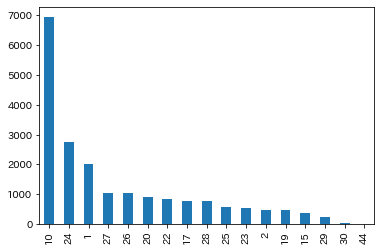

In [19]:
train["categoryId"].value_counts().plot.bar()

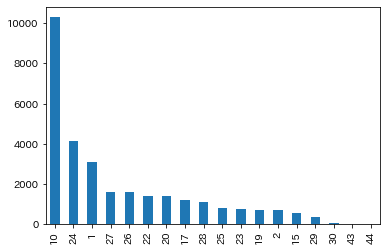

In [20]:
test["categoryId"].value_counts().plot.bar()
# "43"というラベルはtestにだけ存在

## collection_date

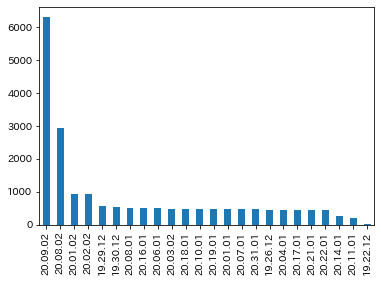

In [21]:
train["collection_date"].value_counts().plot.bar()

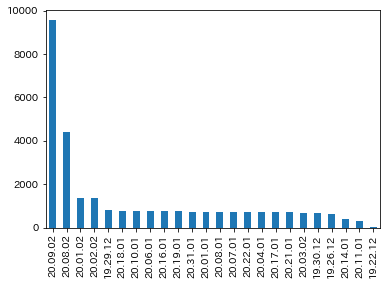

In [22]:
test["collection_date"].value_counts().plot.bar()
# trainと全ての値が共通

## tags

In [23]:
# 欠損値のところを"[none]"にまとめる
train["tags"] = train["tags"].map(lambda x: "[none]" if type(x) == np.float else x)
train["tags"].value_counts()

[none]                                                                                                                                                                                                  917
コバソロ|kobasolo|杏沙子|LeftyHandcream|レフティハンドクリーム|春茶|橋本裕太|君さえいなけりゃ|あなたのことが好きだなんて言えないんです。|足立佳奈|さよならスマイル                                                                                                        19
HidaMaricooking|cooking sound|how to|Tasty|Recipe|Youtube|ASMR                                                                                                                                           17
HidaMaricooking|cooking sound|how to|Tasty|Recipe|Youtube|food|tutorial|chef|kitchen                                                                                                                     13
Hiroshi|Hayashi|Hamamatsu|Japan                                                                                                                                                         

In [24]:
test["tags"].value_counts()
# テキストデータだから別途処理

[none]                                                                                                                                                                                                                                       1398
コバソロ|kobasolo|杏沙子|LeftyHandcream|レフティハンドクリーム|春茶|橋本裕太|君さえいなけりゃ|あなたのことが好きだなんて言えないんです。|足立佳奈|さよならスマイル                                                                                                                                              33
HidaMaricooking|cooking sound|how to|Tasty|Recipe|Youtube|ASMR                                                                                                                                                                                 32
東映|アニメ|60周年                                                                                                                                                                                                                                    23
goose|house|グースハウス|tokyo|ライブ|liv

## likes

In [ ]:
train["likes"].describe()

In [ ]:
test["likes"].describe()

## dislikes

In [ ]:
train["dislikes"].describe()

In [ ]:
test["dislikes"].describe()

## comment_count

In [ ]:
train["comment_count"].describe()

## thumbnail_link

In [ ]:
train["thumbnail_link"].value_counts()

In [ ]:
test["thumbnail_link"].value_counts()
#  trainとtestはそれぞれユニークな画像のサムネイルを持つ
# 画像データだから別途処理

## comments_disabled

In [ ]:
train["comments_disabled"].value_counts().plot.bar()

In [ ]:
test["comments_disabled"].value_counts().plot.bar()

## ratings_disabled

In [ ]:
train["ratings_disabled"].value_counts().plot.bar()

In [ ]:
test["ratings_disabled"].value_counts().plot.bar()

## description

In [ ]:
train["description"].value_counts()

In [ ]:
test["description"].value_counts()
# テキストデータなので別途処理
# trainとtestで646種類共通

## y

In [ ]:
train["y"].hist(bins=20, log=True)

In [ ]:
df["collection_date"] = "20" + df["collection_date"]
df["collection_date"] = pd.to_datetime(df["collection_date"], format="%Y.%d.%m")
df["c_year"] = df["collection_date"].dt.year
df["c_month"] = df["collection_date"].dt.month
df["c_day"] = df["collection_date"].dt.day